# Работающие пенсионеры на российском рынке труда

## Загрузка необходимых библиотек и данных

#### Загрузка библиотек

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import pyreadstat
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import missingno as msno
import linearmodels
import statsmodels
import plotly
import seaborn

#### Загрузка sav данных по индивидам

In [2]:
df_ind, meta = pyreadstat.read_dta('/Users/alexanderkolesnikov/Desktop/DIPLOM/data/DTA/RLMS_IND_1994_2021_2022_08_21_1_v3_rus.dta', encoding = 'utf-8')

## Отбор нужных переменных в данных по индивидам

#### Смотрим на данные

In [3]:
df_ind.head()

,id_w,idind,year,redid_i,id_i,id_h,origsm,inwgt,region,psu,...,s6,s7,s1_1_l,s1_2_l,s2_l,s3_l,s4_l,s5_l,s6_l,s7_l
0,5,1,1994,101,100101.00,1001,1,1.01,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2,1994,102,100102.00,1001,1,1.12,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,3,1994,201,100201.00,1002,1,0.90,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,4,1994,202,100202.00,1002,1,0.96,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1994,203,100203.00,1002,1,1.14,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Отбираем первоначальные переменные

In [4]:
df_ind_selected = df_ind[[\
                         'id_w', 
                         'idind', 
                         'redid_i', 
                         'id_i', 
                         'id_h', 
                         'origsm', 
                         'inwgt', 
                         'psu', 
                         'int_y', 
                         'h3', 
                         'h4',
                         'j1',
                         'j77',
                         'h5',
                         'age',
                         'diplom',
                         'marst',
                         'occup08',
                         'j363',
                         'j76_4',
                         'j89',
                         'j73',
                         'region',
                         'status',
                         'year',
                         'm1',
                         'm2',
                         'm3',
                         'm139',
                         'm20_7',
                         'm20_8',
                         'm20_9y',
                         'm135',
                         'm136',
                         'm137',
                         'm39',
                         'm43',
                         'm44',
                         'm46',
                         'm47',
                         'm58_1',
                         'm59',
                         'm60',
                         'm61',
                         'm62',
                         'm62_1',
                         'm62_2',
                         'm62_1',
                         'm62_2',
                         'm20_61',
                         'm20_61c',
                         'm20_62',
                         'm20_62c',
                         'm20_63',
                         'm20_63c',
                         'm20_64',
                         'm20_64c',
                         'm20_65',
                         'm20_65c',
                         'm20_66',
                         'm20_66c',
                         'm20_67',
                         'm20_620',
                         'm20_69',
                         'm20_610',
                         'm20_611',
                         'm20_612',
                         'm20_613',
                         'm20_614',
                         'm20_615',
                         'm20_616',
                         'm20_617',
                         'm20_618',
                         'm20_619'     
                         ]]

In [5]:
df_ind_selected.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_610,m20_611,m20_612,m20_613,m20_614,m20_615,m20_616,m20_617,m20_618,m20_619
0,5,1,101,100101.00,1001,1,1.01,6,1994,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2,102,100102.00,1001,1,1.12,6,1994,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,3,201,100201.00,1002,1,0.90,6,1994,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,4,202,100202.00,1002,1,0.96,6,1994,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,203,100203.00,1002,1,1.14,6,1994,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Отбираем и переименовываем нужные переменные + отбираем года 2017-2021

In [6]:
df_ind_2017_2021 = df_ind_selected[[\
    #всмопогательные технические переменные:
    'id_w', 'idind', 'redid_i', 'id_i', 'id_h', 'origsm', 'inwgt', 'psu', 'int_y', 'h3', 'h4',
    
    #!год проведения исследования 
    'year',

    #зависимая переменная (!j77):                                 
    'j77', #!статус занятости (1 - есть работа, 2 - нет работы)
    'j1', #основное занятие (1-работа, 2-дек. отпуск, 3-другой опл. отпуск, 4-непол. отпуск, 5-не раб)
    
    #индивидуальные и семейные характеристики:
    'h5', #!пол (1 - мужской, 2 - женский)
    'age', #!возраст
    'diplom', #!образование (в файле есть разбиение)
    'marst', #!семейный статус (в файле разделение)
    'j73', #!наличие пенсии (1 - есть пенсия, 2 - нет пенсии)
    'j363', #!размер нетрудовых доходов
    'status', #!тип населенного пунка (по аналогии надо разделить город/не город)
    #'hh_people', #! - нужно посчитать количество людей в домохозяйстве (через индификатор индивида и домохозяйства либо соединить выбрав только количество из домохозяйства)                                
    #'hh_child',  #! - нужно посчитать есть ли дети в домохозяйстве                          
    'occup08', #профессиональная группа (в кодификаторе разделение)
    'j89', #размер пособия по безработице
    'region', #регион есть в кодификаторе
    
    #переменные, связанные со здоровьем:                                 
    'm1', #!!вес
    'm2', #!!рост в см
    'm3', #!самооценка здоровья (в кодификаторе + переделано на лад Ляшкова, Рощина)
    'm139', #!!есть ли чувство беспокойства и депрессии          
    'm20_7', #!назначена ли группа инвалидности(1 - да, 2 - нет)
    'm20_8', #группа инвалидности (1, 2, 3 соответственно)
    'm20_9y', #год когда была назначена инвалидность
    'm135', #наличие проблем с передвижением (1 - нет, 2 - есть некоторые проблемы, 3 - прикованность к постели)
    'm136', #есть ли проблемы с уходом за собой (1 - нет, 2 - некоторые помыться, одеться, 3 - не модет смтс пмться одться)
    'm137', #проблемы с повседневными делами и обязанностями (1 - нет6 2 - некотторые проблемы, 3 - не способен самостоятельно)
    'm39', #!хирургическая операция в последний год (1 - была, 2 - не было)
    'm43', #!диагноз диабет (1 - да, 2 - нет)
    'm44', #в каком году первый раз был поставлен диагноз диабет
    'm46', #!диагноз "инфаркт миокарда" (1 - да, 2 нет)
    'm47', #в каком году был последний инфаркт
    'm58_1', #говорил ли врач, что повышенное артериальное давление (1 - да, 2 - нет)
    'm59', #!диагноз инсульт (1 - да, 2 - нет)
    'm60', #год последнего инсульта
    'm61', #последствия инсульта (1 - да, 2 - нет)
    'm62', #диагноз "анемия" в послдений год (1 - да, 2 - нет)
    'm62_1',  #диагноз "туберкулез" (1 - да, 2 - нет)
    'm62_2',  #год, в который "туберкулез" поставили последний раз                                
    'm20_61', #!хронические заболевания сердца (1 - да, 2 - нет)
    'm20_62', #хронические заболевания легких (1 - да, 2 - нет)
    'm20_62c', #!характер заболевания легких (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_63', #хронические заболевания печени (1 - да, 2 - нет)
    'm20_63c', #!характер заболевания печени (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_64',  #хронические заболевания почек (1 - да, 2 - нет)
    'm20_64c', #!характер заболевания почек (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_65', #!хронические заболевания ЖКТ (1 - да, 2 - нет)
    'm20_65c', #характер заболевания печени (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_66', #!хронические заболевания позвоночника (1 - да, 2 - нет)
    'm20_66c', #характер заболевания позвоночника (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_67', #!другие хронические заболевания (1 - да, 2 - нет)
    'm20_69', #!!хронические заболевания повышенное артериальное давление (1 - да, 2 - нет)
    'm20_610', #хронические заболевания суставов (1 - да, 2 - нет)
    'm20_611', #!!хронические заболевания ЛОР-органов (1 - да, 2 - нет)
    'm20_612', #хронические заболевания неврологические (1 - да, 2 - нет)
    'm20_613', #хронические заболевания глаз (1 - да, 2 - нет)
    'm20_614', #хронические заболевания гинекологические (1 - да, 2 - нет)
    'm20_615', #хронические заболевания аллергия (1 - да, 2 - нет)
    'm20_616', #хронические заболевания варикозное расширение вен (1 - да, 2 - нет)
    'm20_617', #хронические заболевания кожного покрова (1 - да, 2 - нет)
    'm20_618', #хронические заболевания онкология (1 - да, 2 - нет)
    'm20_619'  #хронические заболевания мочеполовая система (1 - да, 2 - нет)
    ]]
df_ind_2017_2021 = df_ind_2017_2021[df_ind_2017_2021['year'] >= 2017]

In [7]:
df_ind_2017_2021['new_id_i']=df_ind_2017_2021['id_i']
df_ind_2017_2021['new_id_w']=df_ind_2017_2021['id_w']

In [8]:
df_ind_2017_2021.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_612,m20_613,m20_614,m20_615,m20_616,m20_617,m20_618,m20_619,new_id_i,new_id_w
316637,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000101.00,26
316638,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000104.00,26
316639,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,2,1000203.00,26
316640,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,1,1,2,2,2,1,2,2,1000301.00,26
316641,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,2,1000401.00,26


In [9]:
df_ind_vnuk = df_ind_2017_2021[['id_w', 'id_i', 'age']]

In [10]:
df_ind_vnuk['new_id_w'] = df_ind_vnuk['id_w']

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3201471481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind_vnuk['new_id_w'] = df_ind_vnuk['id_w']


In [11]:
df_ind_vnuk.head()

,id_w,id_i,age,new_id_w
316637,26,1000101.00,44,26
316638,26,1000104.00,13,26
316639,26,1000203.00,33,26
316640,26,1000301.00,73,26
316641,26,1000401.00,71,26


In [12]:
df_ind_vnuk.dtypes

id_w          int64
id_i        float64
age           int64
new_id_w      int64
dtype: object

#### Отбираем родственников, чтобы добавить переменную по внуку + отбираем года 2017-2021

In [13]:
df_rdstvnnk, meta = pyreadstat.read_dta('/Users/alexanderkolesnikov/Desktop/DIPLOM/data/DTA/ind_relatives_id_i_idind_USER_RLMS-HSE_HH_1994_2021_rus.dta', encoding = 'utf-8')

In [14]:
df_rdstvnnk.head()

,id_w,id_i,idind,r01a1,r02a1,r02a2,r03a1,r03a2,r04a1,r04a2,...,i17f1,i17f2,i18f1,i18f2,i18f3,i18f4,i99f1,i99f2,i99f3,i99f4
0,1994 год,100101.00,1.00,100102.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994 год,100102.00,2.00,100101.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994 год,100201.00,3.00,100202.00,NaN,NaN,NaN,NaN,100203.00,100204.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994 год,100202.00,4.00,100201.00,NaN,NaN,NaN,NaN,100203.00,100204.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994 год,100203.00,5.00,NaN,100201.00,100202.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
year_list = ['2017 год', '2018 год', '2019 год', '2020 год', '2021 год']
df_rdstvnnk_2017_2021 = df_rdstvnnk[[\
    #всмопогательные технические переменные:
    'id_w', 'id_i', 'r09a1', 'r09a2', 'r09a3', 'r09a4', 'r09a5', 'r09a6'
    ]]
df_rdstvnnk_2017_2021 = df_rdstvnnk_2017_2021[df_rdstvnnk_2017_2021['id_w'].isin(year_list)]

In [16]:
df_rdstvnnk_2017_2021['id_w'].unique()

array(['2017 год', '2018 год', '2019 год', '2020 год', '2021 год'],
      dtype=object)

In [17]:
df_rdstvnnk_2017_2021['r09a1'].unique()

array([          nan, 1.0024080e+06, 1.0037060e+06, ..., 1.4215182e+09,
       1.4216827e+09, 1.4230782e+09])

In [18]:
df_rdstvnnk_2017_2021.sort_values(by=['r09a1'], ascending=True).head()

,id_w,id_i,r09a1,r09a2,r09a3,r09a4,r09a5,r09a6
326253,2017 год,1002401.00,1002408.00,NaN,NaN,NaN,NaN,NaN
345670,2018 год,1002401.00,1002408.00,NaN,NaN,NaN,NaN,NaN
401231,2021 год,1002401.00,1002408.00,NaN,NaN,NaN,NaN,NaN
364428,2019 год,1002401.00,1002408.00,1002411.00,NaN,NaN,NaN,NaN
382979,2020 год,1002401.00,1002408.00,1002411.00,NaN,NaN,NaN,NaN


In [19]:
df_rdstvnnk_2017_2021.shape[0]

93044

In [20]:
df_rdstvnnk_2017_2021 = df_rdstvnnk_2017_2021.rename(columns={"r09a1": "vnuk_1", "r09a2": "vnuk_2",
                                      "r09a3": "vnuk_3", "r09a4": "vnuk_4",
                                      "r09a5": "vnuk_5", "r09a6": "vnuk_6"}, errors="raise")

In [21]:
df_rdstvnnk_2017_2021.head()

,id_w,id_i,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6
326229,2017 год,1000101.00,NaN,NaN,NaN,NaN,NaN,NaN
326230,2017 год,1000104.00,NaN,NaN,NaN,NaN,NaN,NaN
326231,2017 год,1000203.00,NaN,NaN,NaN,NaN,NaN,NaN
326232,2017 год,1000301.00,NaN,NaN,NaN,NaN,NaN,NaN
326233,2017 год,1000401.00,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
conditions = [
    (df_rdstvnnk_2017_2021['id_w'] == '2017 год'),
    (df_rdstvnnk_2017_2021['id_w'] == '2018 год'),
    (df_rdstvnnk_2017_2021['id_w'] == '2019 год'),
    (df_rdstvnnk_2017_2021['id_w'] == '2020 год'),
    (df_rdstvnnk_2017_2021['id_w'] == '2021 год')]

choices = [int(26), int(27), int(28), int(29), int(30)]

df_rdstvnnk_2017_2021['new_id_w'] = np.select(conditions, choices, default=None)

In [23]:
df_rdstvnnk_2017_2021['new_id_w'].describe()

count     93044
unique        5
top          26
freq      19419
Name: new_id_w, dtype: int64

In [24]:
df_rdstvnnk_2017_2021['id_i'].describe()

count        93044.00
mean     117502918.65
std      209427574.05
min        1000101.00
25%       48011401.00
50%       84005003.00
75%      135073001.00
max     1429001801.00
Name: id_i, dtype: float64

In [25]:
df_rdstvnnk_2017_2021.head()

,id_w,id_i,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,new_id_w
326229,2017 год,1000101.00,NaN,NaN,NaN,NaN,NaN,NaN,26
326230,2017 год,1000104.00,NaN,NaN,NaN,NaN,NaN,NaN,26
326231,2017 год,1000203.00,NaN,NaN,NaN,NaN,NaN,NaN,26
326232,2017 год,1000301.00,NaN,NaN,NaN,NaN,NaN,NaN,26
326233,2017 год,1000401.00,NaN,NaN,NaN,NaN,NaN,NaN,26


In [26]:
df_rdstvnnk_2017_2021 = df_rdstvnnk_2017_2021[['id_w', 'id_i', 'new_id_w', 'vnuk_1', 'vnuk_2', 'vnuk_3', 'vnuk_4', 'vnuk_5', 'vnuk_6']]

In [27]:
df_rdstvnnk_2017_2021.sort_values('vnuk_1', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6
326253,2017 год,1002401.00,26,1002408.00,NaN,NaN,NaN,NaN,NaN
345670,2018 год,1002401.00,27,1002408.00,NaN,NaN,NaN,NaN,NaN
401231,2021 год,1002401.00,30,1002408.00,NaN,NaN,NaN,NaN,NaN
364428,2019 год,1002401.00,28,1002408.00,1002411.00,NaN,NaN,NaN,NaN
382979,2020 год,1002401.00,29,1002408.00,1002411.00,NaN,NaN,NaN,NaN


In [28]:
df_ind_vnuk.head()

,id_w,id_i,age,new_id_w
316637,26,1000101.00,44,26
316638,26,1000104.00,13,26
316639,26,1000203.00,33,26
316640,26,1000301.00,73,26
316641,26,1000401.00,71,26


In [29]:
df_ind_vnuk[df_ind_vnuk['id_i'] == 136006308.00]

,id_w,id_i,age,new_id_w
331327,26,136006308.00,48,26
349701,27,136006308.00,49,27
367715,28,136006308.00,50,28
385203,29,136006308.00,51,29
402742,30,136006308.00,52,30


In [30]:
df_ind_vnuk[df_ind_vnuk['id_i'] == 89041605.00]

,id_w,id_i,age,new_id_w
363467,28,89041605.00,0,28


In [31]:
df_ind_vnuk1 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk1['v1_age'] = df_ind_vnuk1['age']
df_ind_vnuk1['vnuk_1'] = df_ind_vnuk1['id_i']
df_ind_vnuk1 = df_ind_vnuk1[['vnuk_1', 'new_id_w', 'v1_age']]
df_ind_vnuk1.head()

,vnuk_1,new_id_w,v1_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [32]:
df_ind_vnuk2 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk2['v2_age'] = df_ind_vnuk2['age']
df_ind_vnuk2['vnuk_2'] = df_ind_vnuk2['id_i']
df_ind_vnuk2 = df_ind_vnuk2[['vnuk_2', 'new_id_w', 'v2_age']]
df_ind_vnuk2.head()

,vnuk_2,new_id_w,v2_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [33]:
df_ind_vnuk3 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk3['v3_age'] = df_ind_vnuk3['age']
df_ind_vnuk3['vnuk_3'] = df_ind_vnuk3['id_i']
df_ind_vnuk3 = df_ind_vnuk3[['vnuk_3', 'new_id_w', 'v3_age']]
df_ind_vnuk3.head()

,vnuk_3,new_id_w,v3_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [34]:
df_ind_vnuk4 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk4['v4_age'] = df_ind_vnuk4['age']
df_ind_vnuk4['vnuk_4'] = df_ind_vnuk4['id_i']
df_ind_vnuk4 = df_ind_vnuk4[['vnuk_4', 'new_id_w', 'v4_age']]
df_ind_vnuk4.head()

,vnuk_4,new_id_w,v4_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [35]:
df_ind_vnuk5 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk5['v5_age'] = df_ind_vnuk5['age']
df_ind_vnuk5['vnuk_5'] = df_ind_vnuk5['id_i']
df_ind_vnuk5 = df_ind_vnuk5[['vnuk_5', 'new_id_w', 'v5_age']]
df_ind_vnuk5.head()

,vnuk_5,new_id_w,v5_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [36]:
df_ind_vnuk6 = df_ind_vnuk[['id_i', 'new_id_w', 'age']]
df_ind_vnuk6['v6_age'] = df_ind_vnuk6['age']
df_ind_vnuk6['vnuk_6'] = df_ind_vnuk6['id_i']
df_ind_vnuk6 = df_ind_vnuk6[['vnuk_6', 'new_id_w', 'v6_age']]
df_ind_vnuk6.head()

,vnuk_6,new_id_w,v6_age
316637,1000101.00,26,44
316638,1000104.00,26,13
316639,1000203.00,26,33
316640,1000301.00,26,73
316641,1000401.00,26,71


In [37]:
df_try = pd.merge(df_rdstvnnk_2017_2021, df_ind_vnuk1,  how='left', left_on=['vnuk_1','new_id_w'], right_on = ['vnuk_1','new_id_w'])

In [38]:
df_try.sort_values('v1_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age
48003,2019 год,89041601.00,28,89041605.00,NaN,NaN,NaN,NaN,NaN,0.00
42905,2019 год,48018202.00,28,48018206.00,NaN,NaN,NaN,NaN,NaN,0.00
15106,2017 год,136038701.00,26,136038703.00,NaN,NaN,NaN,NaN,NaN,0.00
80283,2021 год,58003202.00,30,58003208.00,NaN,NaN,NaN,NaN,NaN,0.00
80413,2021 год,58012001.00,30,58012004.00,NaN,NaN,NaN,NaN,NaN,0.00


In [39]:
df_try2 = pd.merge(df_try, df_ind_vnuk2,  how='left', left_on=['vnuk_2','new_id_w'], right_on = ['vnuk_2','new_id_w'])

In [40]:
df_try2.sort_values('v2_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age
13335,2017 год,116033001.00,26,116033005.00,116033006.00,NaN,NaN,NaN,NaN,5.00,0.00
51889,2019 год,129022801.00,28,129022808.00,129022810.00,NaN,NaN,NaN,NaN,5.00,0.00
68710,2020 год,116029701.00,29,116029706.00,116029707.00,NaN,NaN,NaN,NaN,1.00,0.00
43575,2019 год,52500801.00,28,52500810.00,52500811.00,NaN,NaN,NaN,NaN,2.00,0.00
51783,2019 год,129017704.00,28,129017711.00,129017712.00,NaN,NaN,NaN,NaN,6.00,0.00


In [41]:
df_try3 = pd.merge(df_try2, df_ind_vnuk3,  how='left', left_on=['vnuk_3','new_id_w'], right_on = ['vnuk_3','new_id_w'])

In [42]:
df_try3.sort_values('v3_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age
5874,2017 год,58008803.00,26,58008804.00,58008805.00,58008807.00,NaN,NaN,NaN,7.00,4.00,0.00
27993,2018 год,73024105.00,27,73024107.00,73024108.00,73024109.00,NaN,NaN,NaN,3.00,0.00,0.00
27991,2018 год,73024103.00,27,73024107.00,73024108.00,73024109.00,NaN,NaN,NaN,3.00,0.00,0.00
5622,2017 год,52033701.00,26,52033703.00,52033704.00,52033706.00,NaN,NaN,NaN,15.00,9.00,0.00
55383,2019 год,142074601.00,28,142074606.00,142074607.00,142074610.00,NaN,NaN,NaN,6.00,5.00,0.00


In [43]:
df_try4 = pd.merge(df_try3, df_ind_vnuk4,  how='left', left_on=['vnuk_4','new_id_w'], right_on = ['vnuk_4','new_id_w'])

In [44]:
df_try4.sort_values('v4_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age
293,2017 год,1023406.00,26,1023403.00,1023404.00,1023405.00,1023407.00,NaN,NaN,13.00,14.00,5.00,0.00
12761,2017 год,107010102.00,26,107010106.00,107010107.00,107010108.00,107010109.00,NaN,NaN,8.00,7.00,5.00,0.00
69872,2020 год,129023401.00,29,129023406.00,129023407.00,129023408.00,129023409.00,NaN,NaN,15.00,13.00,6.00,0.00
69929,2020 год,129500903.00,29,129500908.00,129500910.00,129500911.00,129500912.00,NaN,NaN,5.00,4.00,1.00,0.00
69930,2020 год,129500904.00,29,129500908.00,129500910.00,129500911.00,129500912.00,NaN,NaN,5.00,4.00,1.00,0.00


In [45]:
df_try5 = pd.merge(df_try4, df_ind_vnuk5,  how='left', left_on=['vnuk_5','new_id_w'], right_on = ['vnuk_5','new_id_w'])

In [46]:
df_try5.sort_values('v5_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age,v5_age
28756,2018 год,84000103.00,27,84000104.00,84000105.00,84000106.00,84000107.00,84000108.00,NaN,5.00,4.00,3.00,1.00,0.00
68220,2020 год,107010101.00,29,107010106.00,107010107.00,107010108.00,107010109.00,107010110.00,NaN,11.00,10.00,8.00,3.00,0.00
71896,2020 год,138583801.00,29,138583805.00,138583809.00,138583810.00,138583811.00,138583813.00,NaN,8.00,6.00,2.00,1.00,0.00
68221,2020 год,107010102.00,29,107010106.00,107010107.00,107010108.00,107010109.00,107010110.00,NaN,11.00,10.00,8.00,3.00,0.00
49434,2019 год,105029003.00,28,105029004.00,105029007.00,105029008.00,105029009.00,105029010.00,105029011.00,15.00,9.00,4.00,12.00,0.00


In [47]:
df_try6 = pd.merge(df_try5, df_ind_vnuk6,  how='left', left_on=['vnuk_6','new_id_w'], right_on = ['vnuk_6','new_id_w'])

In [48]:
df_try6.sort_values('v6_age', ascending=True).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age,v5_age,v6_age
87849,2021 год,129020501.00,30,129020505.00,129020506.00,129020508.00,129020510.00,129020511.00,129020512.00,21.00,15.00,17.00,7.00,5.00,0.00
21245,2018 год,12600302.00,27,12600304.00,12600305.00,12600306.00,12600307.00,12600309.00,12600310.00,13.00,9.00,7.00,4.00,2.00,0.00
83837,2021 год,84000103.00,30,84000104.00,84000105.00,84000106.00,84000107.00,84000108.00,84000109.00,8.00,7.00,6.00,4.00,3.00,0.00
67403,2020 год,105029003.00,29,105029004.00,105029007.00,105029008.00,105029009.00,105029010.00,105029013.00,16.00,10.00,5.00,13.00,1.00,0.00
87850,2021 год,129020502.00,30,129020505.00,129020506.00,129020508.00,129020510.00,129020511.00,129020512.00,21.00,15.00,17.00,7.00,5.00,0.00


In [49]:
df_try6['v1_age'].describe()

count   6217.00
mean      13.74
std        9.22
min        0.00
25%        6.00
50%       13.00
75%       20.00
max       52.00
Name: v1_age, dtype: float64

In [50]:
#посчитать для каждого id_i и волны если одно хотябы одно из значений v_age меньше или равно 18
df_try6['min_v_age'] = df_try6[['v1_age','v2_age', 'v3_age', 'v4_age', 'v5_age', 'v6_age']].min(axis=1)

In [51]:
df_try6.sort_values('v6_age', ascending=False).head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age,v5_age,v6_age,min_v_age
38085,2018 год,1382449701.00,27,1382449703.00,1382449704.00,1382449705.00,1382449706.00,1382449707.00,1382449708.00,22.00,22.00,17.00,15.00,14.00,26.00,14.00
65563,2020 год,77008801.00,29,77008807.00,77008808.00,77008810.00,77008811.00,77008812.00,77008813.00,14.00,13.00,7.00,10.00,8.00,8.00,7.00
83635,2021 год,77008801.00,30,77008807.00,77008808.00,77008810.00,77008811.00,77008812.00,77008813.00,15.00,14.00,8.00,10.00,9.00,8.00,8.00
81295,2021 год,67017701.00,30,67017703.00,67017704.00,67017705.00,67017706.00,67017707.00,67017708.00,18.00,17.00,16.00,12.00,11.00,8.00,8.00
65564,2020 год,77008802.00,29,77008807.00,77008808.00,77008810.00,77008811.00,77008812.00,77008813.00,14.00,13.00,7.00,10.00,8.00,8.00,7.00


In [52]:
# create a list of our conditions
conditions = [
    (df_try6['min_v_age'] < 18),
    (df_try6['min_v_age'] >= 18)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_try6['infant_vnuk'] = np.select(conditions, values)

In [53]:
df_try6.sort_values('min_v_age').head()

,id_w,id_i,new_id_w,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age,v5_age,v6_age,min_v_age,infant_vnuk
26143,2018 год,67018301.00,27,67018304.00,67018305.00,NaN,NaN,NaN,NaN,7.00,0.00,NaN,NaN,NaN,NaN,0.00,1
37280,2018 год,142503608.00,27,142503610.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,1
41808,2019 год,46002106.00,28,46002114.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,1
72509,2020 год,141251601.00,29,141251609.00,141251611.00,NaN,NaN,NaN,NaN,3.00,0.00,NaN,NaN,NaN,NaN,0.00,1
11416,2017 год,100006301.00,26,100006305.00,100006307.00,100006308.00,NaN,NaN,NaN,12.00,10.00,0.00,NaN,NaN,NaN,0.00,1


In [54]:
df_try6.sort_values('min_v_age').describe()

,id_i,vnuk_1,vnuk_2,vnuk_3,vnuk_4,vnuk_5,vnuk_6,v1_age,v2_age,v3_age,v4_age,v5_age,v6_age,min_v_age,infant_vnuk
count,93044.00,6350.00,2378.00,655.00,177.00,72.00,43.00,6217.00,2340.00,645.00,173.00,71.00,43.00,6235.00,93044.00
mean,117502918.65,127772773.48,134280723.78,125062996.46,135354874.07,168815577.46,101322407.19,13.74,9.54,7.36,5.44,6.59,3.98,11.33,0.05
std,209427574.05,224794058.48,246250587.87,222240110.73,239050646.31,337481276.27,203184365.24,9.22,7.69,5.98,4.11,6.76,4.32,9.52,0.22
min,1000101.00,1002408.00,1002411.00,1006707.00,1023107.00,1023408.00,9114516.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48011401.00,52023404.00,52032107.00,52502418.00,67017706.00,67017707.00,67017708.00,6.00,4.00,3.00,3.00,2.00,1.00,4.00,0.00
50%,84005003.00,92079202.00,89004907.00,84600107.00,105101609.00,77008812.00,77003714.00,13.00,8.00,6.00,5.00,4.00,3.00,9.00,0.00
75%,135073001.00,137020608.25,129500910.00,129023408.00,129500912.00,120021185.25,80504461.00,20.00,13.00,10.00,7.00,9.00,5.00,17.00,0.00
max,1429001801.00,1429001404.00,1429001405.00,1402452206.00,1402449707.00,1402449708.00,1382449708.00,52.00,51.00,36.00,18.00,29.00,26.00,52.00,1.00


In [55]:
#основной датасет
df_ind_2017_2021.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_612,m20_613,m20_614,m20_615,m20_616,m20_617,m20_618,m20_619,new_id_i,new_id_w
316637,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000101.00,26
316638,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000104.00,26
316639,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,2,1000203.00,26
316640,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,1,1,2,2,2,1,2,2,1000301.00,26
316641,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,2,1000401.00,26


In [56]:
#датасет с переменной наличия несовершенного внука в домохозяйстве
df_age_vnuka = df_try6[['id_i', 'new_id_w', 'infant_vnuk']]

In [57]:
df_age_vnuka.head()

,id_i,new_id_w,infant_vnuk
0,1000101.00,26,0
1,1000104.00,26,0
2,1000203.00,26,0
3,1000301.00,26,0
4,1000401.00,26,0


#### Отбираем домохозяйства, чтобы добавить переменную численность домохозяйства + отбираем года 2017-2021

In [58]:
df_dmhz, meta = pyreadstat.read_dta('/Users/alexanderkolesnikov/Desktop/DIPLOM/data/DTA/RLMS_HH_1994_2021_rus_v4_dta.dta', encoding = 'utf-8')

In [59]:
df_dmhz.head()

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,...,h6913_6,h6923_6,g1_1,g1_2,g2,g3,g4,g5,g6,g7
0,5,1,1001,1001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,2,1,3,3,2,NaN
1,5,2,1002,1002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,1,1,3,3,2,NaN
2,5,3,1003,1003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,1,1,3,3,2,NaN
3,5,4,1004,1004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,1,1,3,3,2,NaN
4,5,5,1005,1005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,1,1,3,3,3,NaN


In [60]:
df_dmhz.columns[df_dmhz.columns.str.contains('nfm')]

Index(['nfm', 'nfm1_o', 'nfm1_n'], dtype='object')

In [61]:
df_dmhz_selected = df_dmhz[['id_w', 'id_h', 'nfm1_o', 'nfm1_n', 'nfm']]

In [62]:
df_dmhz_selected.head()

,id_w,id_h,nfm1_o,nfm1_n,nfm
0,5,1001,NaN,NaN,2
1,5,1002,NaN,NaN,4
2,5,1003,NaN,NaN,1
3,5,1004,NaN,NaN,1
4,5,1005,NaN,NaN,2


In [63]:
df_dmhz_ready = df_dmhz_selected[['id_w', 'id_h', 'nfm']]

In [64]:
df_dmhz_ready['id_w'].describe()

count   151906.00
mean        19.09
std          7.10
min          5.00
25%         14.00
50%         20.00
75%         25.00
max         30.00
Name: id_w, dtype: float64

In [65]:
year_list = [26, 27, 28, 29, 30]
df_dmhz_ready_final = df_dmhz_ready[df_dmhz_ready['id_w'].isin(year_list)]

In [66]:
#датасет с домохозяйствами и количеством людей
df_dmhz_ready_final.head()

,id_w,id_h,nfm
117462,26,10001,2
117463,26,10002,1
117464,26,10003,1
117465,26,10004,2
117466,26,10010,2


#### Собираем воедино файл с индивидами, внуками и домохозяйствами

In [67]:
#превоначальный файл с индивидами:
df_ind_2017_2021.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_612,m20_613,m20_614,m20_615,m20_616,m20_617,m20_618,m20_619,new_id_i,new_id_w
316637,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000101.00,26
316638,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1000104.00,26
316639,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,2,1000203.00,26
316640,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,1,1,2,2,2,1,2,2,1000301.00,26
316641,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,2,1000401.00,26


In [68]:
#датасет с домохозяйствами и количеством людей
df_dmhz_ready_final.head()

,id_w,id_h,nfm
117462,26,10001,2
117463,26,10002,1
117464,26,10003,1
117465,26,10004,2
117466,26,10010,2


In [69]:
#датасет с переменной наличия несовершеннолетнего внука в домохозяйстве
df_age_vnuka.head()

,id_i,new_id_w,infant_vnuk
0,1000101.00,26,0
1,1000104.00,26,0
2,1000203.00,26,0
3,1000301.00,26,0
4,1000401.00,26,0


In [70]:
#соединение файла индивидов и файла с количеством людей в домохозяйстве:
df_merging_ind_dmhz = pd.merge(df_ind_2017_2021, df_dmhz_ready_final,  how='left', left_on=['id_w','id_h'], right_on = ['id_w','id_h'])

In [71]:
df_merging_ind_dmhz.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_613,m20_614,m20_615,m20_616,m20_617,m20_618,m20_619,new_id_i,new_id_w,nfm
0,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,1000101.00,26,2
1,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,1000104.00,26,2
2,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,1000203.00,26,1
3,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,1,2,2,2,1,2,2,1000301.00,26,1
4,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,1000401.00,26,2


In [72]:
#соединение файла предыдущего с файлом про внуков:
df_merging_final = pd.merge(df_merging_ind_dmhz, df_age_vnuka,  how='left', left_on=['id_w','id_i'], right_on = ['new_id_w','id_i'])

In [73]:
df_merging_final.sort_values('infant_vnuk', ascending=False).head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m20_615,m20_616,m20_617,m20_618,m20_619,new_id_i,new_id_w_x,nfm,new_id_w_y,infant_vnuk
12224,26,46179,353802,106043802.00,1060438,1,1.21,25,2017,438,...,2,2,2,2,2,106043802.00,26,4,26,1
86143,30,60006,36302,136010702.00,1360107,1,1.07,9,2021,107,...,2,1,1,2,2,136010702.00,30,4,30,1
60132,29,26094,161101,52016501.00,520165,1,1.11,23,2020,165,...,2,2,2,2,2,52016501.00,29,6,29,1
20651,27,57411,320803,12052803.00,120528,0,0.00,29,2018,528,...,2,2,2,2,2,12052803.00,27,3,27,1
42238,28,12066,550401,52018801.00,520188,1,0.70,23,2019,188,...,2,2,2,2,2,52018801.00,28,5,28,1


In [74]:
data_2017_2021 = df_merging_final[[\
    #всмопогательные технические переменные:
    'id_w', 'idind', 'redid_i', 'id_i', 'id_h', 'origsm', 'inwgt', 'psu', 'int_y', 'h3', 'h4',
    
    #!год проведения исследования 
    'year',

    #зависимая переменная (!j77):                                 
    'j77', #!статус занятости (1 - есть работа, 2 - нет работы)
    'j1', #!основное занятие (1-работа, 2-дек. отпуск, 3-другой опл. отпуск, 4-непол. отпуск, 5-не раб)
    
    #индивидуальные и семейные характеристики:
    'h5', #!пол (1 - мужской, 2 - женский)
    'age', #!возраст
    'diplom', #!образование (в файле есть разбиение)
    'marst', #!семейный статус (в файле разделение)
    'j73', #!наличие пенсии (1 - есть пенсия, 2 - нет пенсии)
    'j363', #!размер нетрудовых доходов
    'status', #!тип населенного пунка (по аналогии надо разделить город/не город)
    'nfm', #! - нужно посчитать количество людей в домохозяйстве (через индификатор индивида и домохозяйства либо соединить выбрав только количество из домохозяйства)                                
    'infant_vnuk',  #! - нужно посчитать есть ли дети в домохозяйстве                          
    'occup08', #профессиональная группа (в кодификаторе разделение)
    'region', #регион есть в кодификаторе
    
    #переменные, связанные со здоровьем:                                 
    'm1', #!!вес
    'm2', #!!рост в см
    'm3', #!самооценка здоровья (в кодификаторе + переделано на лад Ляшкова, Рощина)
    'm139', #!!есть ли чувство беспокойства и депрессии          
    'm20_7', #!назначена ли группа инвалидности(1 - да, 2 - нет)
    'm39', #!хирургическая операция в последний год (1 - была, 2 - не было)
    'm43', #!диагноз диабет (1 - да, 2 - нет)
    'm46', #!диагноз "инфаркт миокарда" (1 - да, 2 нет)
    'm59', #!диагноз инсульт (1 - да, 2 - нет)                                
    'm20_61', #!хронические заболевания сердца (1 - да, 2 - нет)
    'm20_62', #!характер заболевания легких (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_63', #!характер заболевания печени (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_64', #!характер заболевания почек (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_65', #!хронические заболевания ЖКТ (1 - да, 2 - нет)
    'm20_66', #!хронические заболевания позвоночника (1 - да, 2 - нет)
    'm20_67', #!другие хронические заболевания (1 - да, 2 - нет)
    'm20_69', #!!хронические заболевания повышенное артериальное давление (1 - да, 2 - нет)
    'm20_611' #!!хронические заболевания ЛОР-органов (1 - да, 2 - нет)
    ]]
data_2017_2021 = data_2017_2021[data_2017_2021['year'] >= 2017]

In [75]:
data_2017_2021.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,m59,m20_61,m20_62,m20_63,m20_64,m20_65,m20_66,m20_67,m20_69,m20_611
0,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1,2
1,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,NaN,2,2,2,2,2,2,2,2,2
2,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,2,2,2
3,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,2,1,2,2,2,1,1,2,1,2
4,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,2,2,2


#### Переименовывание переменных

In [76]:
data_2017_2021=data_2017_2021.rename(columns={    
    
    #зависимая переменная (!j77):                                 
    'j77':'employed', #!статус занятости (1 - есть работа, 2 - нет работы)
    'j1':'main_job', #!основное занятие (1-работа, 2-дек. отпуск, 3-другой опл. отпуск, 4-непол. отпуск, 5-не раб)
    
    #индивидуальные и семейные характеристики:
    'h5':'sex', #!пол (1 - мужской, 2 - женский)
    #'diplom', #!образование (в файле есть разбиение)
    #'marst', #!семейный статус (в файле разделение)
    'j73':'pension', #!наличие пенсии (1 - есть пенсия, 2 - нет пенсии)
    'j363':'unearned_income', #!размер нетрудовых доходов
    'status':'city_status', #!тип населенного пункта (по аналогии надо разделить город/не город)
    'nfm':'hhld_size', #! - нужно посчитать количество людей в домохозяйстве (через индификатор индивида и домохозяйства либо соединить выбрав только количество из домохозяйства)                                
    #'infant_vnuk',  #! - нужно посчитать есть ли дети в домохозяйстве                          
    'occup08':'occup', #профессиональная группа (в кодификаторе разделение)
    #'region', #регион есть в кодификаторе
    
    #переменные, связанные со здоровьем:                                 
    'm1':'p_weight', #!!вес
    'm2':'p_height', #!!рост в см
    'm3':'health_slfstm', #!самооценка здоровья (в кодификаторе + переделано на лад Ляшкова, Рощина)
    'm139':'depression', #!!есть ли чувство беспокойства и депрессии          
    'm20_7':'disabled', #!назначена ли группа инвалидности(1 - да, 2 - нет)
    'm39':'operation', #!хирургическая операция в последний год (1 - была, 2 - не было)
    'm43':'diabet', #!диагноз диабет (1 - да, 2 - нет)
    'm46':'infarkt', #!диагноз "инфаркт миокарда" (1 - да, 2 нет)
    'm59':'insult', #!диагноз инсульт (1 - да, 2 - нет)                                
    'm20_61':'chron_heart', #!хронические заболевания сердца (1 - да, 2 - нет)
    'm20_62':'chron_lungs', #!характер заболевания легких (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_63':'chron_liver', #!характер заболевания печени (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_64':'chron_kidneys', #!характер заболевания почек (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'm20_65':'chron_gastro', #!хронические заболевания ЖКТ (1 - да, 2 - нет)
    'm20_66':'chron_spine', #!хронические заболевания позвоночника (1 - да, 2 - нет)
    'm20_67':'chron_other', #!другие хронические заболевания (1 - да, 2 - нет)
    'm20_69':'chron_arterial', #!!хронические заболевания повышенное артериальное давление (1 - да, 2 - нет)
    'm20_611':'chron_ENT' #!!хронические заболевания ЛОР-органов (1 - да, 2 - нет)
})

In [77]:
data_2017_2021.head()

,id_w,idind,redid_i,id_i,id_h,origsm,inwgt,psu,int_y,h3,...,insult,chron_heart,chron_lungs,chron_liver,chron_kidneys,chron_gastro,chron_spine,chron_other,chron_arterial,chron_ENT
0,26,1,34101,1000101.00,10001,0,0.00,6,2017,1,...,2,2,2,2,2,2,2,2,1,2
1,26,24101,34104,1000104.00,10001,0,0.00,6,2017,1,...,NaN,2,2,2,2,2,2,2,2,2
2,26,5,33903,1000203.00,10002,0,0.00,6,2017,2,...,2,2,2,2,2,2,2,2,2,2
3,26,7,34401,1000301.00,10003,1,0.67,6,2017,3,...,2,1,2,2,2,1,1,2,1,2
4,26,9,34001,1000401.00,10004,1,0.67,6,2017,4,...,2,2,2,2,2,2,2,2,2,2


#### Размер выборки перед удалением пропущенных значений и выбросов

In [98]:
vars_before_cleaning = data_2017_2021[[
    #всмопогательные технические переменные:
    'id_w', 'idind', 'id_i', 'year',
    #зависимая переменная (!j77):                                 
    'employed', #!статус занятости (1 - есть работа, 2 - нет работы)
    #'j1':'main_job', #!основное занятие (1-работа, 2-дек. отпуск, 3-другой опл. отпуск, 4-непол. отпуск, 5-не раб)
    
    #индивидуальные и семейные характеристики:
    'age', #!возраст
    'sex', #!пол (1 - мужской, 2 - женский)
    'diplom', #!образование (в файле есть разбиение)
    'marst', #!семейный статус (в файле разделение)
    'pension', #!наличие пенсии (1 - есть пенсия, 2 - нет пенсии)
    #'unearned_income', #!размер нетрудовых доходов
    'city_status', #!тип населенного пункта (по аналогии надо разделить город/не город)
    'hhld_size', #! - нужно посчитать количество людей в домохозяйстве (через индификатор индивида и домохозяйства либо соединить выбрав только количество из домохозяйства)                                
    'infant_vnuk',  #! - нужно посчитать есть ли дети в домохозяйстве                          
    #'occup08':'occup', #профессиональная группа (в кодификаторе разделение)
    #'region', #регион есть в кодификаторе
    
    #переменные, связанные со здоровьем:                                 
    #'p_weight', #!!вес
    #'p_height', #!!рост в см
    'health_slfstm', #!самооценка здоровья (в кодификаторе + переделано на лад Ляшкова, Рощина)
    #'depression', #!!есть ли чувство беспокойства и депрессии          
    'disabled', #!назначена ли группа инвалидности(1 - да, 2 - нет)
    'operation', #!хирургическая операция в последний год (1 - была, 2 - не было)
    'diabet', #!диагноз диабет (1 - да, 2 - нет)
    'infarkt', #!диагноз "инфаркт миокарда" (1 - да, 2 нет)
    'insult', #!диагноз инсульт (1 - да, 2 - нет)                                
    'chron_heart', #!хронические заболевания сердца (1 - да, 2 - нет)
    'chron_lungs', #!характер заболевания легких (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'chron_liver', #!характер заболевания печени (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'chron_kidneys', #!характер заболевания почек (1 - наследственное, 2 - врожденное, 3 - приобр профессионально, 4 - приобр по другим причинам)
    'chron_gastro', #!хронические заболевания ЖКТ (1 - да, 2 - нет)
    'chron_spine', #!хронические заболевания позвоночника (1 - да, 2 - нет)
    'chron_other' #!другие хронические заболевания (1 - да, 2 - нет)
    #'chron_arterial', #!!хронические заболевания повышенное артериальное давление (1 - да, 2 - нет)
    #'chron_ENT' #!!хронические заболевания ЛОР-органов (1 - да, 2 - нет)
]]

In [99]:
vars_before_cleaning['age'].describe()

count   90554.00
mean       39.32
std        22.77
min         0.00
25%        20.00
50%        39.00
75%        58.00
max       103.00
Name: age, dtype: float64

In [100]:
#отбираем пенсионный возраст
vars_before_cleaning = vars_before_cleaning[vars_before_cleaning.age >= 45]
vars_before_cleaning = vars_before_cleaning[vars_before_cleaning.age <= 72]

In [101]:
vars_before_cleaning['age'].describe()

count   30591.00
mean       57.87
std         7.88
min        45.00
25%        51.00
50%        58.00
75%        64.00
max        72.00
Name: age, dtype: float64

In [102]:
vars_before_cleaning.head()

,id_w,idind,id_i,year,employed,age,sex,diplom,marst,pension,...,diabet,infarkt,insult,chron_heart,chron_lungs,chron_liver,chron_kidneys,chron_gastro,chron_spine,chron_other
4,26,9,1000401.00,2017,2,71,2,5,2,1,...,2,2,2,2,2,2,2,2,2,2
6,26,3,1001201.00,2017,1,62,2,4,5,1,...,1,2,2,2,2,2,2,1,2,2
10,26,25031,1001401.00,2017,2,68,2,6,5,1,...,2,2,2,1,2,1,1,2,2,2
16,26,29,1002102.00,2017,2,46,2,4,4,2,...,2,2,2,2,2,2,2,1,2,2
22,26,37,1002402.00,2017,1,60,1,4,2,1,...,2,2,2,2,2,2,2,2,2,2


<Axes: >

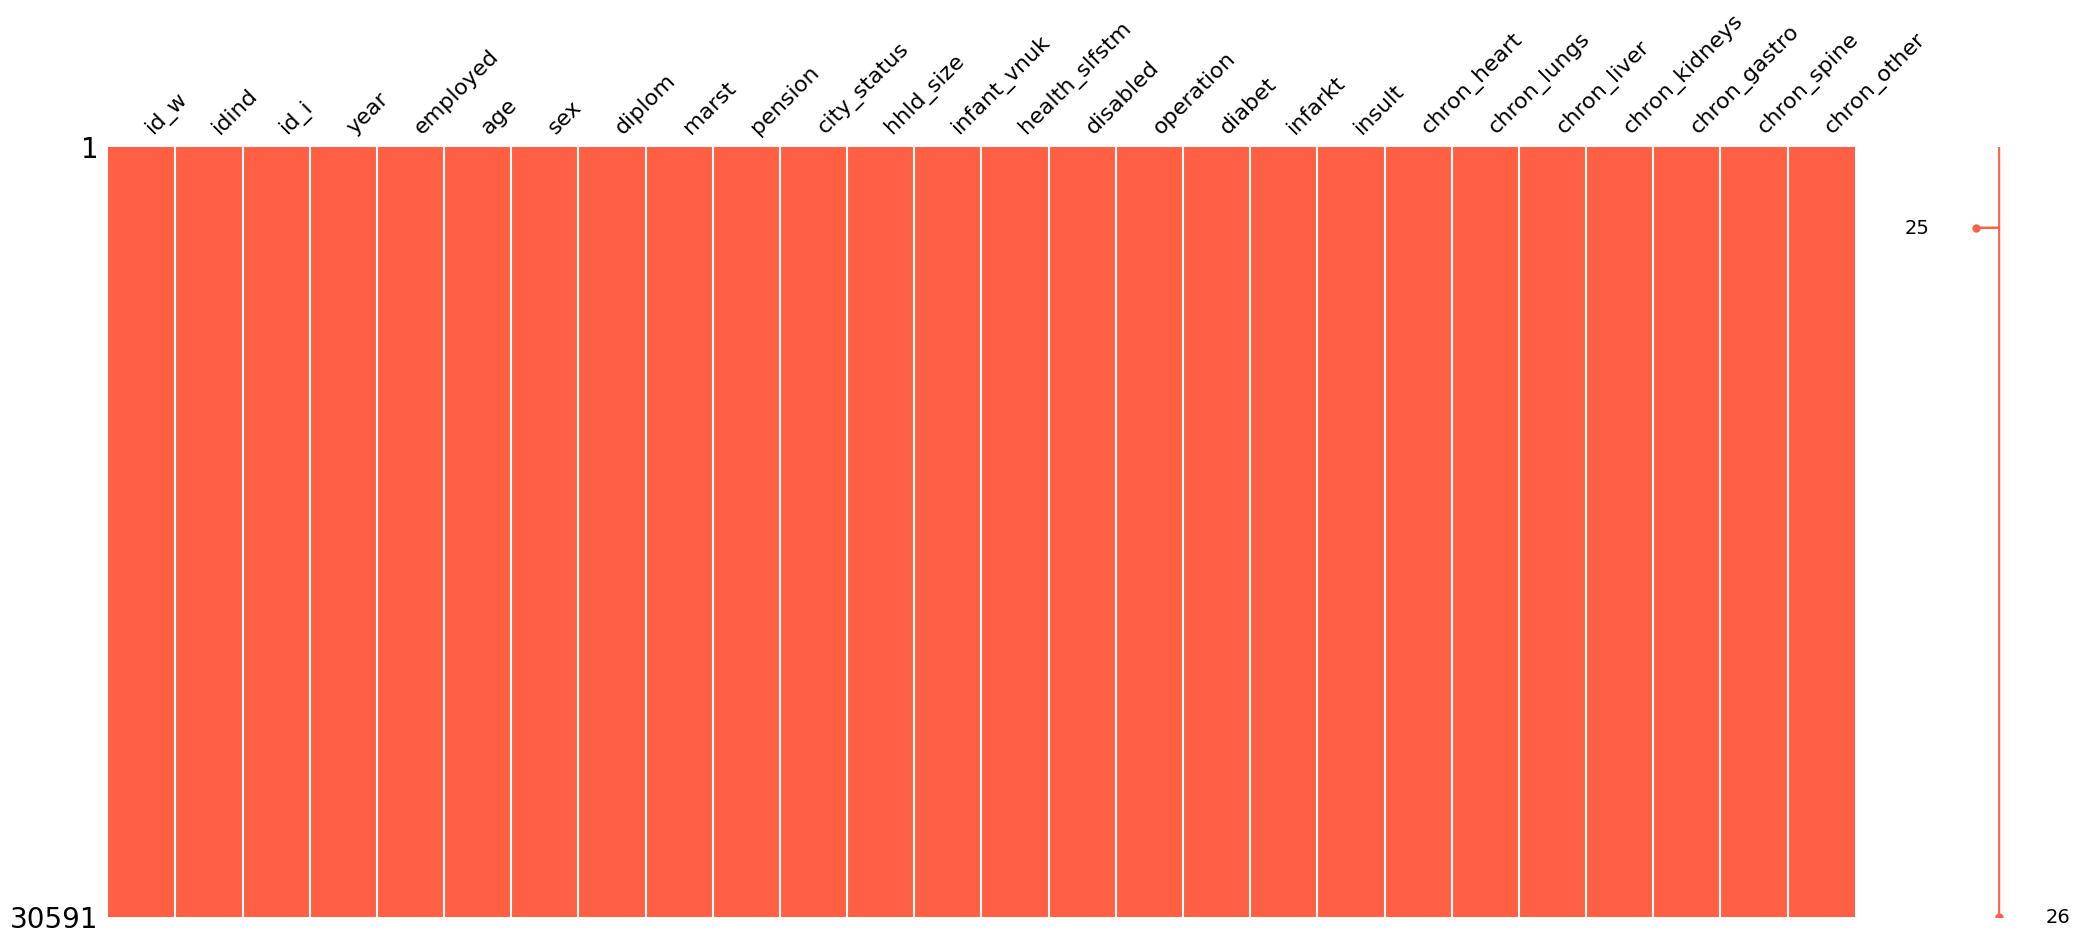

In [103]:
msno.matrix(vars_before_cleaning, color = (1, 0.38, 0.27))

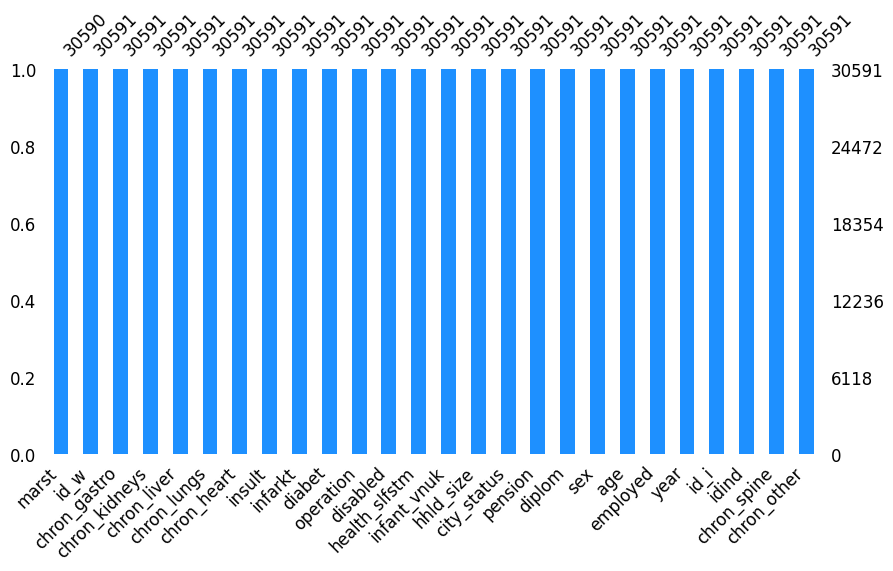

In [104]:
p = msno.bar(vars_before_cleaning, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [105]:
data_with_nan = vars_before_cleaning.replace(99999999,np.NaN)
data_with_nan = data_with_nan.replace(99999997,np.NaN)
data_with_nan = data_with_nan.replace(99999998,np.NaN)
data_with_nan = data_with_nan.replace(99999996,np.NaN)

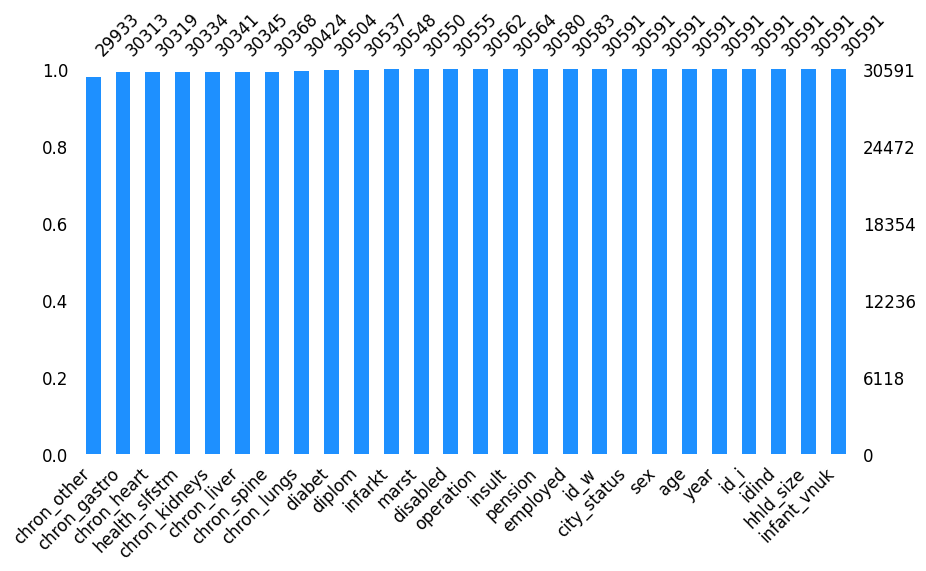

In [106]:
p = msno.bar(data_with_nan, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: >

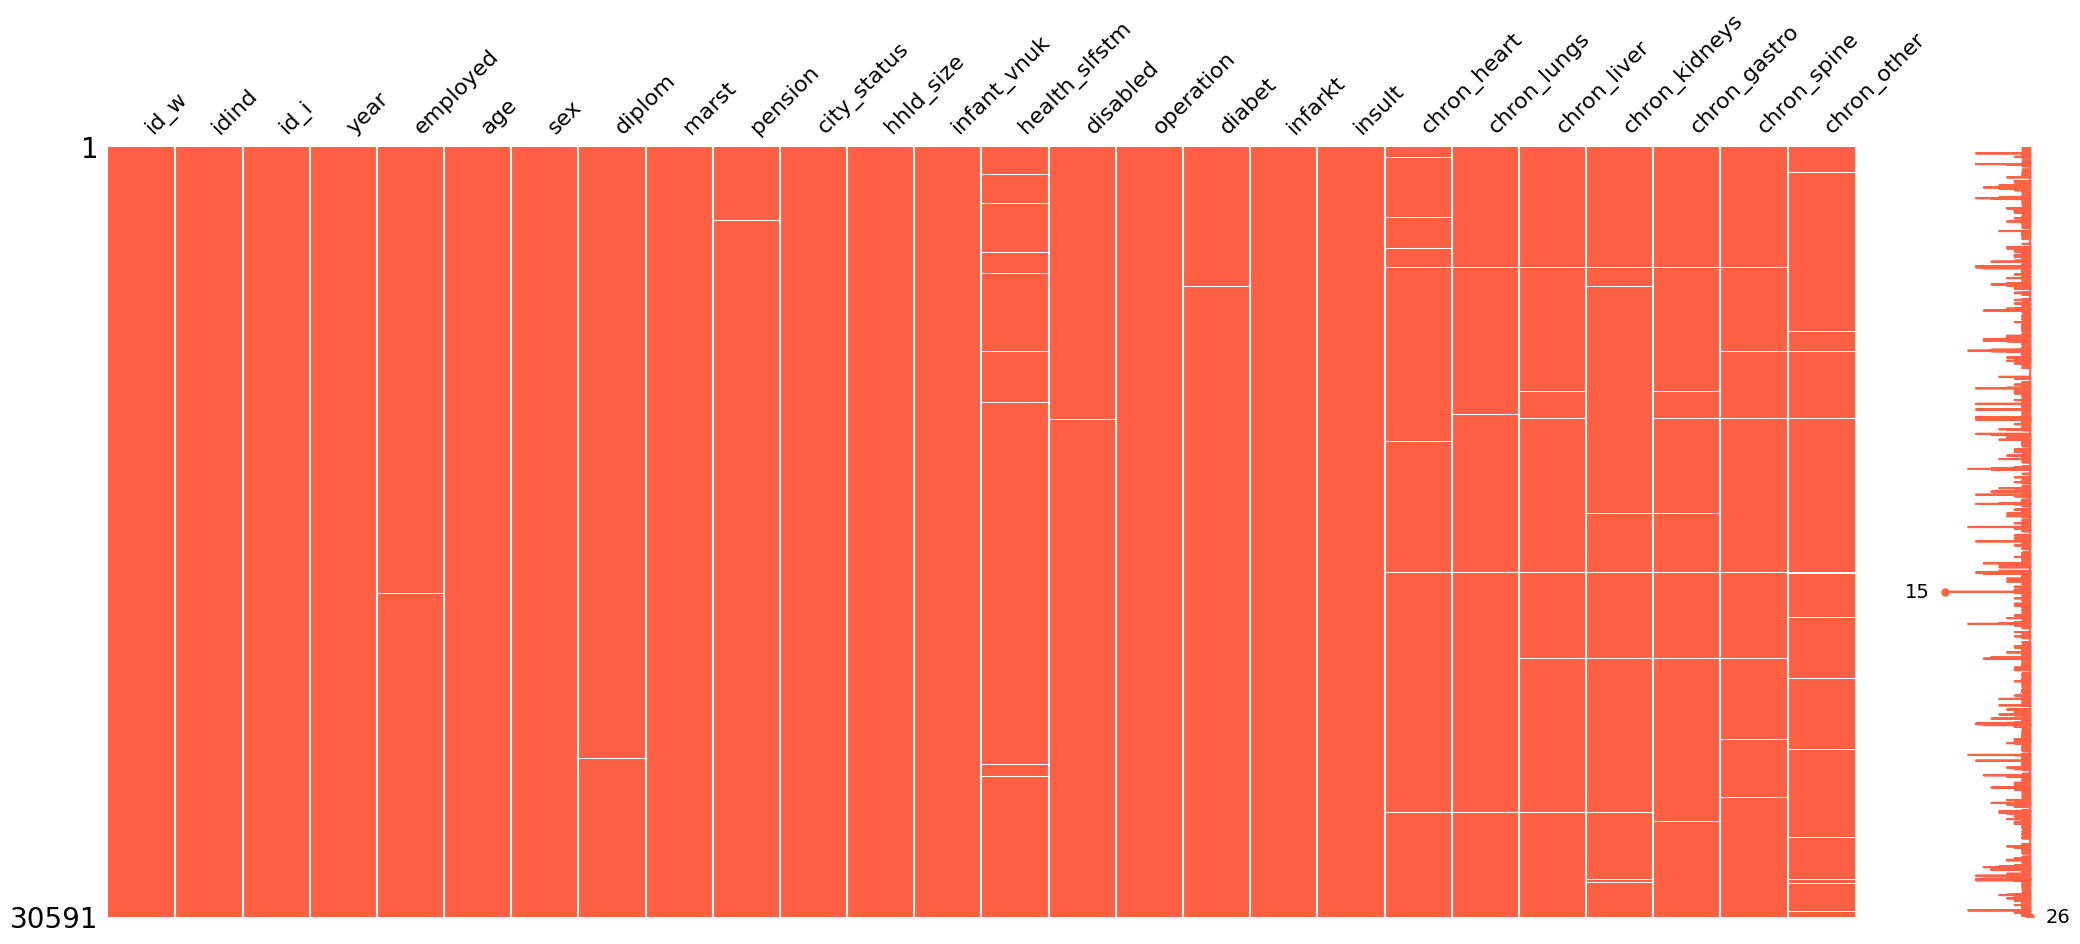

In [107]:
msno.matrix(data_with_nan, color = (1, 0.38, 0.27))

## Отсечка данных

In [349]:
#данные с нужными переменными и отобранными годами, а также возрастом инидвидов (пенсионеров)
#далее только удаление выбросов и преобразование категорийных переменных
final_data_without_nan = data_with_nan.dropna()

<Axes: >

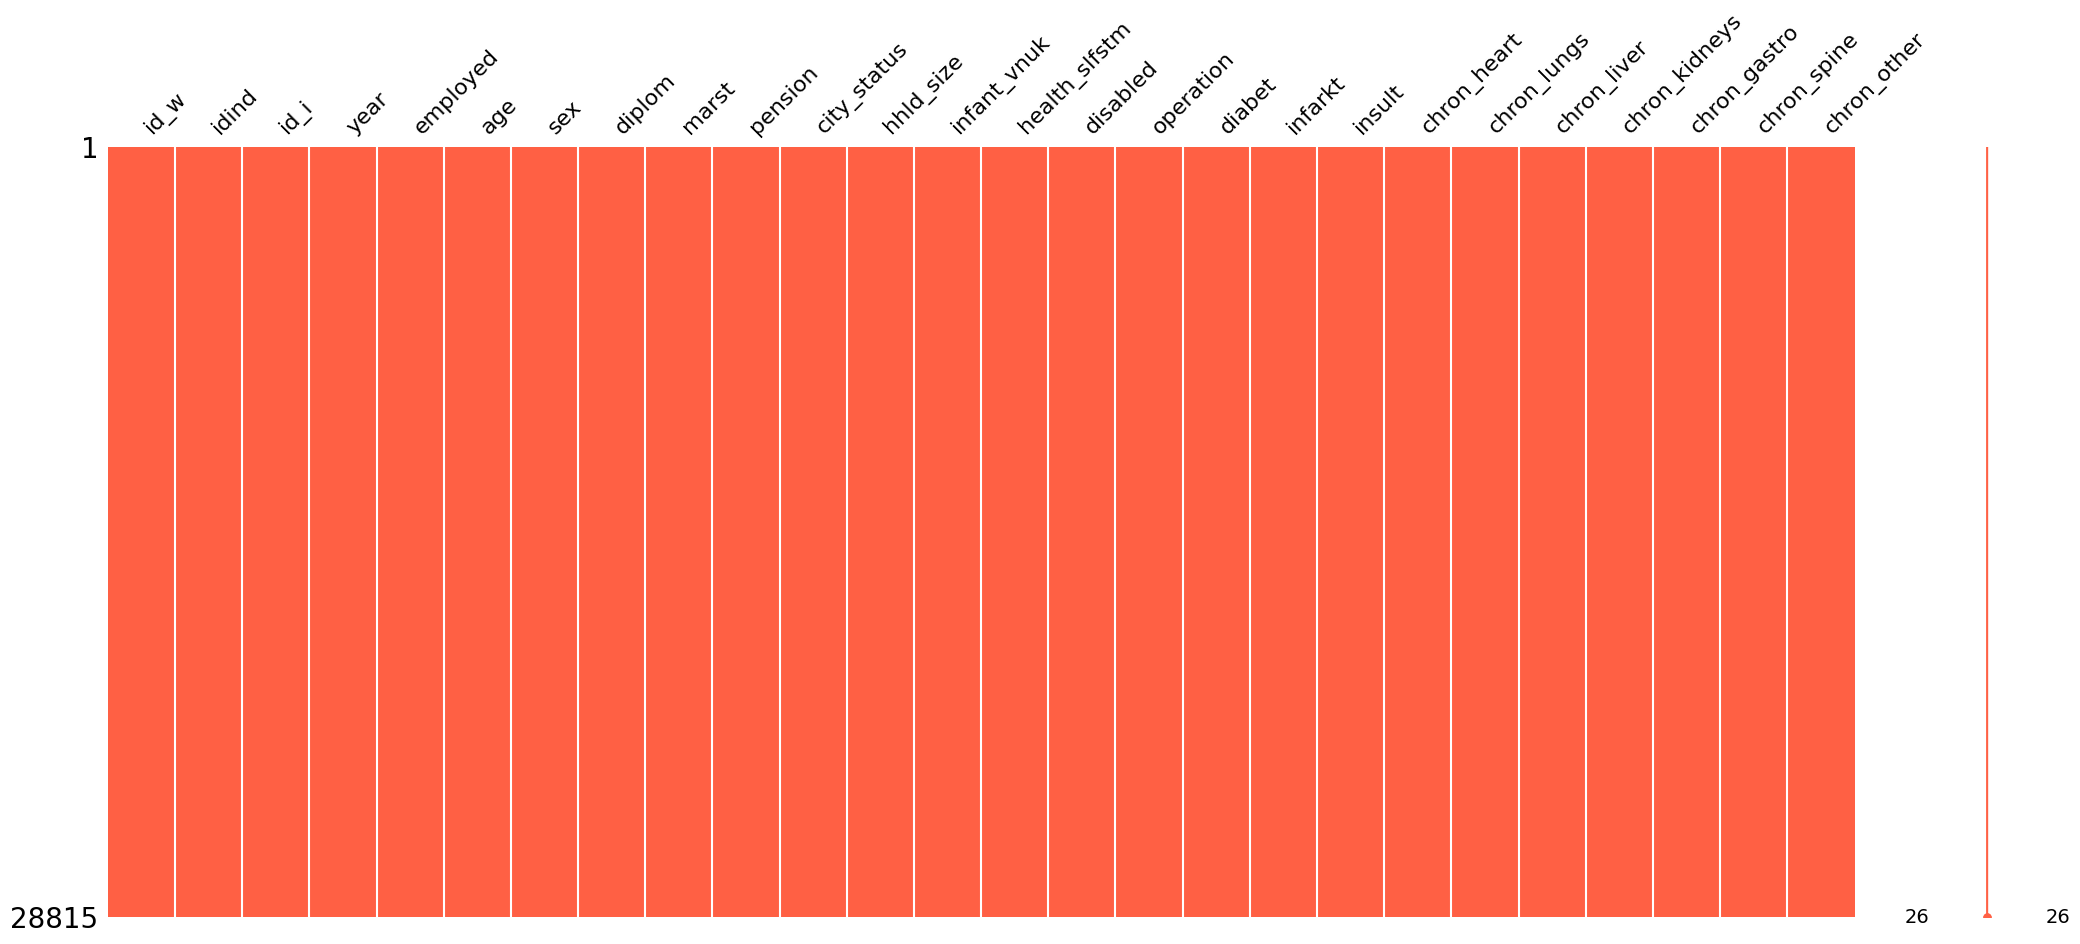

In [350]:
msno.matrix(final_data_without_nan, color = (1, 0.38, 0.27))

In [351]:
final_data_without_nan.head()

,id_w,idind,id_i,year,employed,age,sex,diplom,marst,pension,...,diabet,infarkt,insult,chron_heart,chron_lungs,chron_liver,chron_kidneys,chron_gastro,chron_spine,chron_other
4,26,9,1000401.00,2017,2.00,71,2,5.00,2.00,1.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
6,26,3,1001201.00,2017,1.00,62,2,4.00,5.00,1.00,...,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
10,26,25031,1001401.00,2017,2.00,68,2,6.00,5.00,1.00,...,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00
16,26,29,1002102.00,2017,2.00,46,2,4.00,4.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
22,26,37,1002402.00,2017,1.00,60,1,4.00,2.00,1.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


## График распределения людей пенсионного возраста (изначальный)

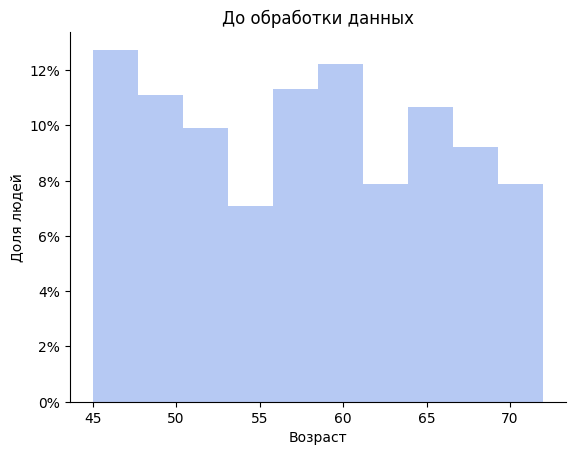

In [352]:
#data.hist('age', grid=False, color='#B6C9F3', density=True)
from matplotlib.ticker import PercentFormatter
plt.hist(final_data_without_nan['age'], weights=np.ones(len(final_data_without_nan)) / len(final_data_without_nan), color = '#B6C9F3')

#plt.show()
plt.xlabel('Возраст')
plt.ylabel('Доля людей')
plt.title('До обработки данных')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
#plt.show()
#убираем верхнюю и правую рамки
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

### Создание новой переменной категории возраста

In [353]:
conditions = [
    (final_data_without_nan['age'] >= 45) & (final_data_without_nan['age'] <= 49),
    (final_data_without_nan['age'] >= 50) & (final_data_without_nan['age'] <= 54),
    (final_data_without_nan['age'] >= 55) & (final_data_without_nan['age'] <= 59),
    (final_data_without_nan['age'] >= 60) & (final_data_without_nan['age'] <= 64),
    (final_data_without_nan['age'] >= 65) & (final_data_without_nan['age'] <= 72)]

choices = ['45-49', '50-54', '55-59', '60-64', '65-72']

final_data_without_nan['agecat'] = np.select(conditions, choices, default=None)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/4238299827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_without_nan['agecat'] = np.select(conditions, choices, default=None)


In [354]:
final_data_without_nan['agecat'].describe()

count     28815
unique        5
top       65-72
freq       6929
Name: agecat, dtype: object

## График распределения людей по возрастным категориям (преобразованный)

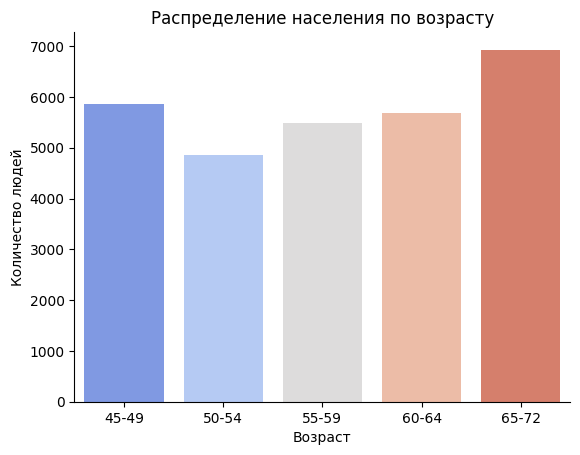

In [355]:
agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']
seaborn.countplot(x = 'agecat', data = final_data_without_nan, order = agecat_order, palette='coolwarm')

plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Распределение населения по возрасту')

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

#убираем верхнюю и правую рамки
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

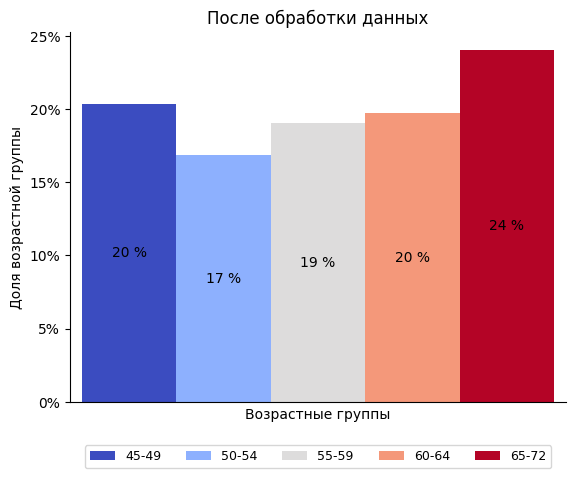

In [356]:
p = final_data_without_nan.pivot_table(columns='agecat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=False, cmap='coolwarm', width = 10)
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xticks([])
plt.xlabel('Возрастные группы')
plt.ylabel('Доля возрастной группы')
plt.title('После обработки данных')

for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

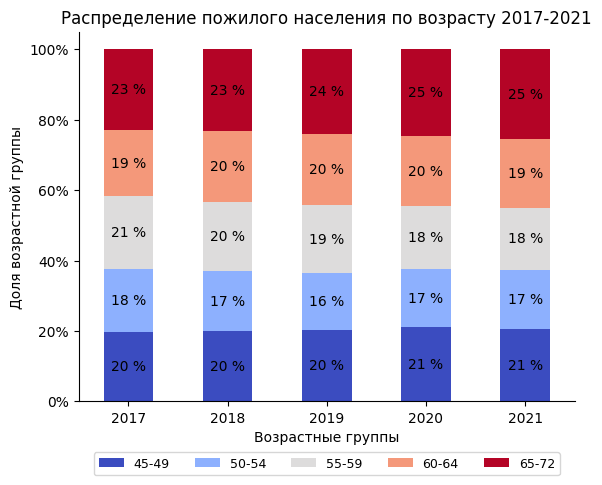

In [357]:
p = final_data_without_nan.pivot_table(index='year', columns='agecat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('Возрастные группы')
plt.ylabel('Доля возрастной группы')
plt.title('Распределение пожилого населения по возрасту 2017-2021')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

## График распределения нетрудовых доходов

In [ ]:
#data.hist('age', grid=False, color='#B6C9F3', density=True)
#from matplotlib.ticker import PercentFormatter
#plt.hist(data_with_nan['unearned_income'], weights=np.ones(len(data_with_nan)) / len(data_with_nan), color = '#B6C9F3')

#plt.show()
#plt.xlabel('Месячный нетрудовой доход, руб.')
#plt.ylabel('Доля людей')
#plt.title('Распределение нетрудовых доходов')

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
#plt.xlim(0, 35000)
#plt.show()
#убираем верхнюю и правую рамки
#for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

In [ ]:
#data_with_nan['log_unearned_uncome'] = np.log(data_with_nan['unearned_income'])

In [ ]:
#data_with_nan['log_unearned_uncome']

In [ ]:
#data.hist('age', grid=False, color='#B6C9F3', density=True)
#from matplotlib.ticker import PercentFormatter
#plt.hist(data_with_nan['log_unearned_income'], weights=np.ones(len(data)) / len(data), color = '#B6C9F3')

#plt.hist(data_with_nan['log_unearned_uncome'], density=True, color = '#B6C9F3')


#plt.show()
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Плотность распределения нетрудовых доходов после логарифмирования')

#a = seaborn.distplot(data_with_nan['log_unearned_uncome'], kde=True, bins=20, hist=True)

#a.set(xlabel='', ylabel='')

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
#plt.show()
#убираем верхнюю и правую рамки
#for pos in ['top', 'right']:
    #plt.gca().spines[pos].set_visible(False)

In [ ]:
#a = sns.boxplot(x=data_with_nan["log_unearned_uncome"], palette="Blues")
#a.set(xlabel='', ylabel='')
#plt.title('Распределение нетрудовых доходов после логарифмирования')

In [ ]:
#data_with_nan['log_unearned_income_cleaned'] = data_with_nan['log_unearned_uncome']
#cols = ['log_unearned_income_cleaned']

#Q1 = data_with_nan[cols].quantile(0.25)
#Q3 = data_with_nan[cols].quantile(0.75)
#IQR = Q3 - Q1

#data_with_nan = data_with_nan[~((data_with_nan[cols] < (Q1 - 1.5 * IQR)) |(data_with_nan[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
#data_with_nan = data_with_nan[data_with_nan['log_unearned_income_cleaned'].notna()]

In [ ]:
#a = sns.boxplot(x=data_with_nan["log_unearned_income_cleaned"], palette="Blues")
#a.set(xlabel='', ylabel='')
#plt.title('Распределение нетрудовых доходов после логарифмирования и удаления выбросов')

In [ ]:
#data.hist('age', grid=False, color='#B6C9F3', density=True)
#from matplotlib.ticker import PercentFormatter
#plt.hist(data_with_nan['log_unearned_income'], weights=np.ones(len(data)) / len(data), color = '#B6C9F3')

#plt.hist(data_with_nan['log_unearned_uncome'], density=True, color = '#B6C9F3')


#plt.show()
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Плотность распределения нетрудовых доходов после логарифмирования и удаления выбросов')

#a = seaborn.distplot(data_with_nan['log_unearned_income_cleaned'], kde=True, bins=20, hist=True)

#a.set(xlabel='', ylabel='')

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
#plt.show()
#убираем верхнюю и правую рамки
#for pos in ['top', 'right']:
    #plt.gca().spines[pos].set_visible(False)

## График распределения по численности домохозяйства

In [358]:
final_data_without_nan['hhld_size'].describe()

count   28815.00
mean        2.89
std         1.65
min         1.00
25%         2.00
50%         2.00
75%         4.00
max        16.00
Name: hhld_size, dtype: float64

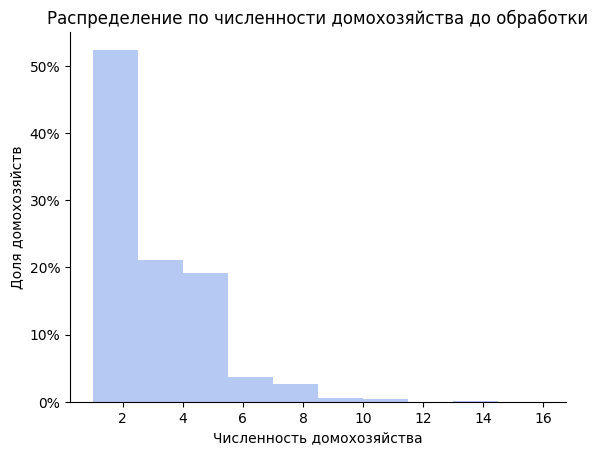

In [359]:
#data.hist('age', grid=False, color='#B6C9F3', density=True)
from matplotlib.ticker import PercentFormatter
plt.hist(final_data_without_nan['hhld_size'], weights=np.ones(len(final_data_without_nan)) / len(final_data_without_nan), color = '#B6C9F3')

#plt.show()
plt.xlabel('Численность домохозяйства')
plt.ylabel('Доля домохозяйств')
plt.title('Распределение по численности домохозяйства до обработки')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
#plt.xlim(0, 80000)
#plt.show()
#убираем верхнюю и правую рамки
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

Text(0.5, 1.0, 'До обработки данных')

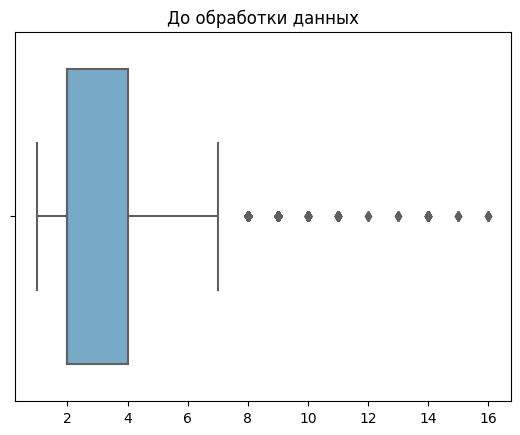

In [360]:
dmhz = seaborn.boxplot(x=final_data_without_nan["hhld_size"], palette="Blues")
dmhz.set(xlabel='', ylabel='')
plt.title('До обработки данных')

In [365]:
final_data_without_nan['hhld_size_celaned'] = final_data_without_nan['hhld_size']
cols = ['hhld_size_celaned']

Q1 = final_data_without_nan[cols].quantile(0.25)
Q3 = final_data_without_nan[cols].quantile(0.75)
IQR = Q3 - Q1

final_data_without_nan = final_data_without_nan[~((final_data_without_nan[cols] < (Q1 - 1.5 * IQR)) |(final_data_without_nan[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


Text(0.5, 1.0, 'После обработки')

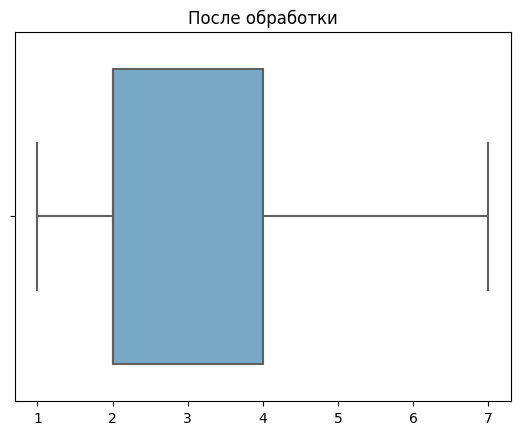

In [366]:
dmhz = seaborn.boxplot(x=final_data_without_nan["hhld_size_celaned"], palette="Blues")
dmhz.set(xlabel='', ylabel='')
plt.title('После обработки')

In [363]:
conditions = [
    (final_data_without_nan['hhld_size_celaned'] == 1),
    (final_data_without_nan['hhld_size_celaned'] == 2),
    (final_data_without_nan['hhld_size_celaned'] == 3),
    (final_data_without_nan['hhld_size_celaned'] == 4),
    (final_data_without_nan['hhld_size_celaned'] == 5),
    (final_data_without_nan['hhld_size_celaned'] == 6),
    (final_data_without_nan['hhld_size_celaned'] == 7)]

choices = ['1', '2', '3', '4', '5', '6', '7']

final_data_without_nan['hhld_size_celaned_cat'] = np.select(conditions, choices, default=None)

IndexError: list index out of range

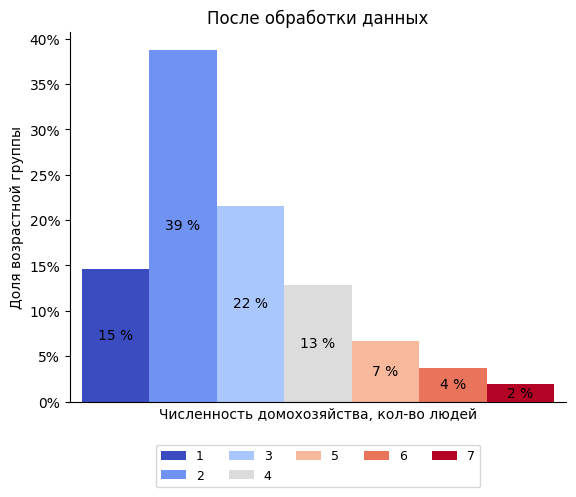

In [364]:
p = final_data_without_nan.pivot_table(columns='hhld_size_celaned_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=False, cmap='coolwarm', width = 10)
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xticks([])
plt.xlabel('Численность домохозяйства, кол-во людей')
plt.ylabel('Доля возрастной группы')
plt.title('После обработки данных')

for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])

ax.legend([h[0], h[1], h[2], h[3], h[4], h[5], h[6]], [l[0], l[1], l[2], l[3], l[4], l[5], l[6]], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)

IndexError: list index out of range

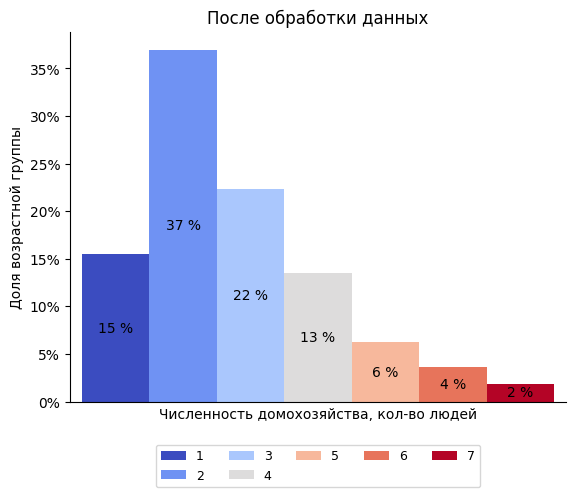

In [749]:
mask = ((data_for_model['year'] == 2021))
p = final_data_without_nan[mask].pivot_table(columns='hhld_size_celaned_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=False, cmap='coolwarm', width = 10)
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xticks([])
plt.xlabel('Численность домохозяйства, кол-во людей')
plt.ylabel('Доля возрастной группы')
plt.title('После обработки данных')

for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])

ax.legend([h[0], h[1], h[2], h[3], h[4], h[5], h[6]], [l[0], l[1], l[2], l[3], l[4], l[5], l[6]], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)

## !!!!График распределения людей по уровню образования (изначальный)

In [367]:
#пеереименовываем значение перемеенной diplom:
diplom_dict = {1 : '0-6 классов', 2:'7-8 классов', 3:'7-8 классов +', 4:'< среднее образование', 5:'< среднее специальное', 6:'>= высшее образование'}
final_data_without_nan['diplom_labeled'] = final_data_without_nan['diplom'].map(diplom_dict).astype('category')

In [368]:
final_data_without_nan['diplom_labeled'].unique()

['< среднее специальное', '< среднее образование', '>= высшее образование', '7-8 классов', '7-8 классов +', '0-6 классов']
Categories (6, object): ['0-6 классов', '7-8 классов', '7-8 классов +', '< среднее образование', '< среднее специальное', '>= высшее образование']

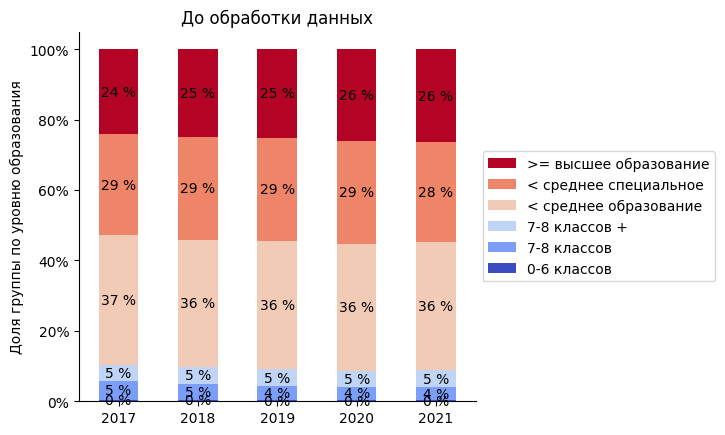

In [369]:
#diplom_labeled_order = ['0-6 классов', '7-8 классов', '7-8 классов +', '< среднее образование', '< среднее специальное', '>= высшее образование']
#seaborn.countplot(x = 'diplom_labeled', data = data, order = diplom_labeled_order, palette='coolwarm')

p = final_data_without_nan.pivot_table(index='year', columns='diplom_labeled', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля группы по уровню образования')
plt.title('До обработки данных')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()
plt.legend([h[5], h[4], h[3], h[2], h[1], h[0]], [l[5], l[4], l[3], l[2], l[1], l[0]])

# Put a legend to the right of the current axis
ax.legend([h[5], h[4], h[3], h[2], h[1], h[0]], [l[5], l[4], l[3], l[2], l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

  
# specify order
#order = ['>= высшее образование', '< среднее специальное', '< среднее образование', '7-8 классов +', '7-8 классов', '0-6 классов']

In [370]:
#cоздание новой переменной educ_group:
educ_group_dict = {1 :'Основное или начальное общее', 
                   2:'Основное или начальное общее', 
                   3:'Начальное профессиональное',
                   4:'Среднее общее', 
                   5:'Среднее профессиональное', 
                   6:'Высшее'}
final_data_without_nan['educ_group'] = final_data_without_nan['diplom'].map(educ_group_dict).astype('category')
final_data_without_nan['educ_group'] = final_data_without_nan['educ_group'].cat.set_categories(list(educ_group_dict.values())[1:], ordered=True)








#conditions = [
    #(data['diplom'] == 1) | (data['diplom'] == 2),
    #(data['diplom'] == 3),
    #(data['diplom'] == 4),
    #(data['diplom'] == 5),
   # (data['diplom'] == 6)
#]

#choices = ['Основное или начальное общее', 'Начальное профессиональное', 'Среднее общее', 'Среднее профессиональное', 'Высшее']

#data['educ_group'] = np.select(conditions, choices, default=None)

In [371]:
final_data_without_nan['educ_group'].unique()

['Среднее профессиональное', 'Среднее общее', 'Высшее', 'Основное или начальное общее', 'Начальное профессиональное']
Categories (5, object): ['Основное или начальное общее' < 'Начальное профессиональное' < 'Среднее общее' < 'Среднее профессиональное' < 'Высшее']

## !!!!!График распределения людей по уровню образования (преобразованный)

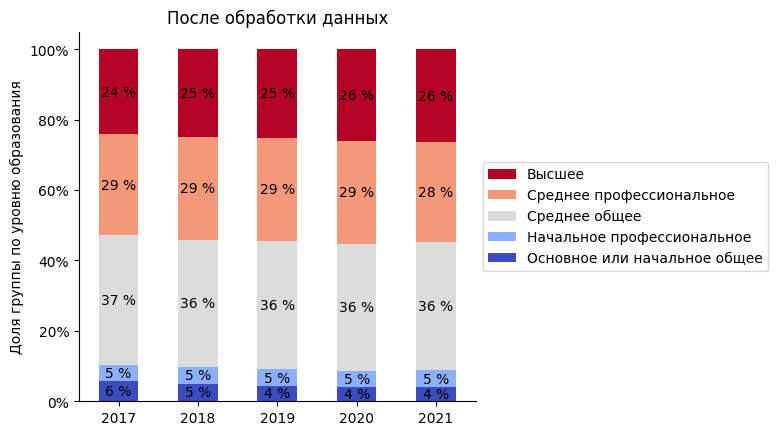

In [372]:
p = final_data_without_nan.pivot_table(index='year', columns='educ_group', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля группы по уровню образования')
plt.title('После обработки данных')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[4], h[3], h[2], h[1], h[0]], [l[4], l[3], l[2], l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

#### Создаем группы по здоровью

In [373]:
health_dict = {1 : 'Хорошее', 2:'Хорошее', 3:'Среднее', 4:'Плохое', 5:'Совсем плохое'}
final_data_without_nan['healthcat'] = final_data_without_nan['health_slfstm'].map(health_dict).astype('category')
final_data_without_nan['healthcat'] = final_data_without_nan['healthcat'].cat.set_categories(list(health_dict.values())[1:], ordered=True)

In [374]:
final_data_without_nan['healthcat']

4        Среднее
6        Среднее
10       Среднее
16       Среднее
22       Среднее
          ...   
90548    Среднее
90549    Среднее
90550    Среднее
90551    Среднее
90552    Среднее
Name: healthcat, Length: 28280, dtype: category
Categories (4, object): ['Хорошее' < 'Среднее' < 'Плохое' < 'Совсем плохое']

### Динамика оценок здоровья пожилого населения 2017-2021

In [375]:
health_dict_before = {1 : 'Очень хорошее', 2:'Хорошее', 3:'Среднее', 4:'Плохое', 5:'Совсем плохое'}
final_data_without_nan['healthcat_before'] = final_data_without_nan['health_slfstm'].map(health_dict_before).astype('category')
final_data_without_nan['healthcat_before'] = final_data_without_nan['healthcat_before'].cat.set_categories(list(health_dict_before.values())[0:], ordered=True)

In [376]:
final_data_without_nan['healthcat_before']

4        Среднее
6        Среднее
10       Среднее
16       Среднее
22       Среднее
          ...   
90548    Среднее
90549    Среднее
90550    Среднее
90551    Среднее
90552    Среднее
Name: healthcat_before, Length: 28280, dtype: category
Categories (5, object): ['Очень хорошее' < 'Хорошее' < 'Среднее' < 'Плохое' < 'Совсем плохое']

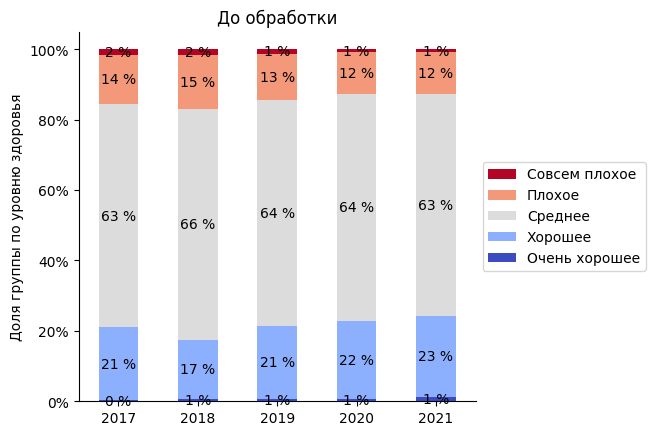

In [377]:
p = final_data_without_nan.pivot_table(index='year', columns='healthcat_before', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля группы по уровню здоровья')
plt.title('До обработки')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[4], h[3], h[2], h[1], h[0]], [l[4], l[3], l[2], l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

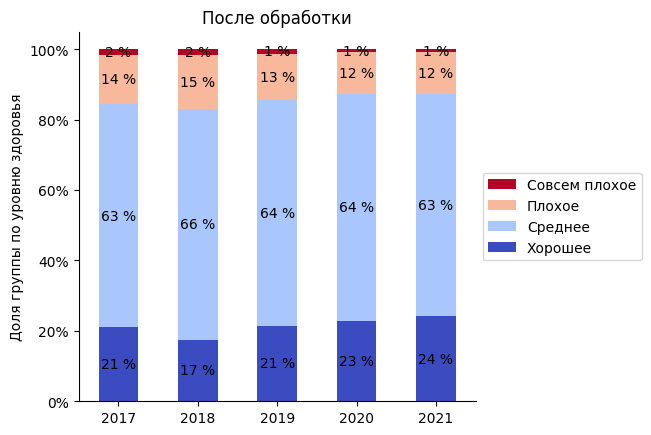

In [378]:
p = final_data_without_nan.pivot_table(index='year', columns='healthcat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля группы по уровню здоровья')
plt.title('После обработки')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[3], h[2], h[1], h[0]], [l[3], l[2], l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

#### Создаем группы по статусу занятости

In [379]:
final_data_without_nan['employed'].unique()

array([2., 1.])

In [380]:
final_data_without_nan['employed'].describe()

count   28280.00
mean        1.51
std         0.50
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: employed, dtype: float64

In [381]:
final_data_without_nan['employed'].describe()

count   28280.00
mean        1.51
std         0.50
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: employed, dtype: float64

In [382]:
employed_dict = {1.00 : 'Трудоустроен', 2.00 : 'Безработный'}
final_data_without_nan['employed_cat'] = final_data_without_nan['employed'].map(employed_dict).astype('category')
final_data_without_nan['employed_cat'] = final_data_without_nan['employed_cat'].cat.set_categories(list(employed_dict.values())[0:], ordered=True)

In [383]:
final_data_without_nan['employed_cat'].unique()

['Безработный', 'Трудоустроен']
Categories (2, object): ['Трудоустроен' < 'Безработный']

### Распределение населения по статусу трудоустройства 2017-2021

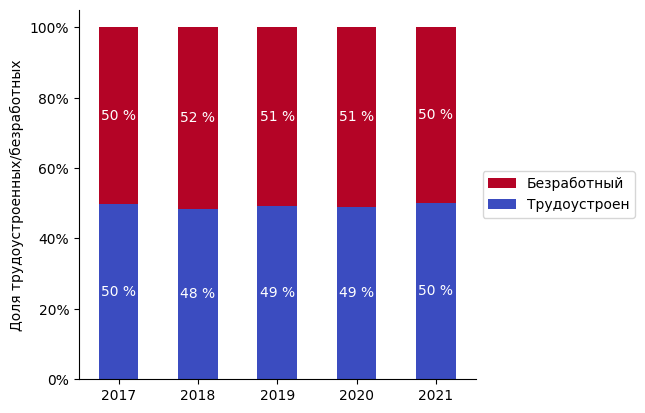

In [384]:
p = final_data_without_nan.pivot_table(index='year', columns='employed_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля трудоустроенных/безработных')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

#### Создаем группы по полу

In [385]:
final_data_without_nan['sex'].unique()

array([2, 1])

In [386]:
sex_dict = {1 : 'Мужчина', 2 : 'Женщина'}
final_data_without_nan['sex_cat'] = final_data_without_nan['sex'].map(sex_dict).astype('category')
final_data_without_nan['sex_cat'] = final_data_without_nan['sex_cat'].cat.set_categories(list(sex_dict.values())[0:], ordered=True)

In [387]:
final_data_without_nan['sex_cat'].unique()

['Женщина', 'Мужчина']
Categories (2, object): ['Мужчина' < 'Женщина']

In [388]:
final_data_without_nan['sex_cat'].describe()

count       28280
unique          2
top       Женщина
freq        17186
Name: sex_cat, dtype: object

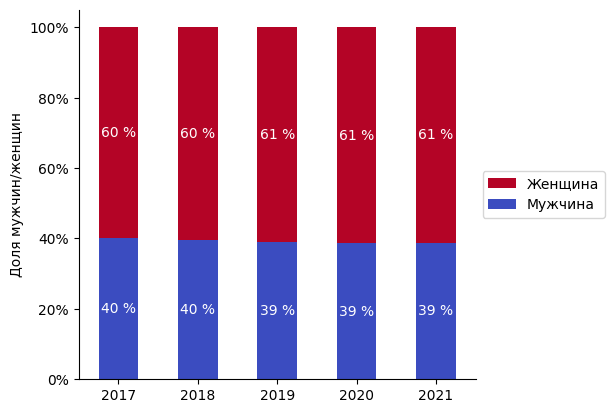

In [389]:
p = final_data_without_nan.pivot_table(index='year', columns='sex_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля мужчин/женщин')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

### Распределение населения по наличию пенсии 2017-2021

#### Создаем группы по наличию пенсии

In [390]:
final_data_without_nan['pension'].unique()

array([1., 2.])

In [391]:
final_data_without_nan['pension'].describe()

count   28280.00
mean        1.39
std         0.49
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         2.00
Name: pension, dtype: float64

In [392]:
pension_dict = {1 : 'Есть пенсия', 2 : 'Нет пенсии'}
final_data_without_nan['pension_cat'] = final_data_without_nan['pension'].map(pension_dict).astype('category')
final_data_without_nan['pension_cat'] = final_data_without_nan['pension_cat'].cat.set_categories(list(pension_dict.values())[0:], ordered=True)

In [393]:
final_data_without_nan['pension_cat'].unique()

['Есть пенсия', 'Нет пенсии']
Categories (2, object): ['Есть пенсия' < 'Нет пенсии']

In [394]:
final_data_without_nan['pension_cat'].describe()

count           28280
unique              2
top       Есть пенсия
freq            17265
Name: pension_cat, dtype: object

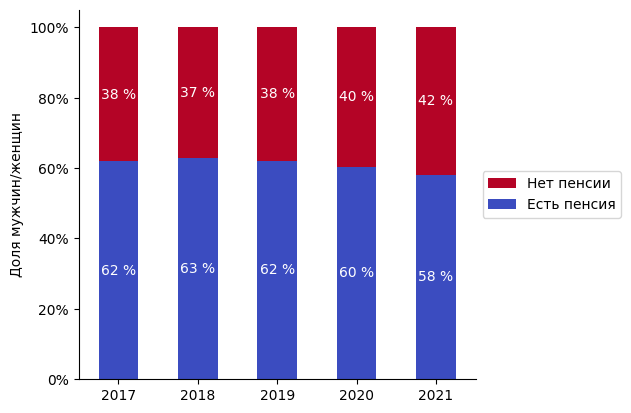

In [395]:
p = final_data_without_nan.pivot_table(index='year', columns='pension_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля мужчин/женщин')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

### Распределение населения по месту проживания 2017-2021

#### Создаем группы по проживанию в городе

In [396]:
final_data_without_nan['city_status'].describe()

count   28280.00
mean        2.18
std         1.20
min         1.00
25%         1.00
50%         2.00
75%         4.00
max         4.00
Name: city_status, dtype: float64

In [397]:
final_data_without_nan['city_status'].unique()

array([3, 4, 1, 2])

In [398]:
city_status_dict = {1 : 'Город', 2 : 'Город', 3 : 'Село', 4 : 'Село'}
final_data_without_nan['city_status_cat'] = final_data_without_nan['city_status'].map(city_status_dict).astype('category')
#data_with_nan['city_status_cat'] = data_with_nan['city_status_cat'].cat.set_categories(list(city_status_dict.values())[1:], ordered=True)

In [399]:
final_data_without_nan['city_status_cat'].unique()

['Село', 'Город']
Categories (2, object): ['Город', 'Село']

In [400]:
final_data_without_nan['city_status_cat'].describe()

count     28280
unique        2
top       Город
freq      19076
Name: city_status_cat, dtype: object

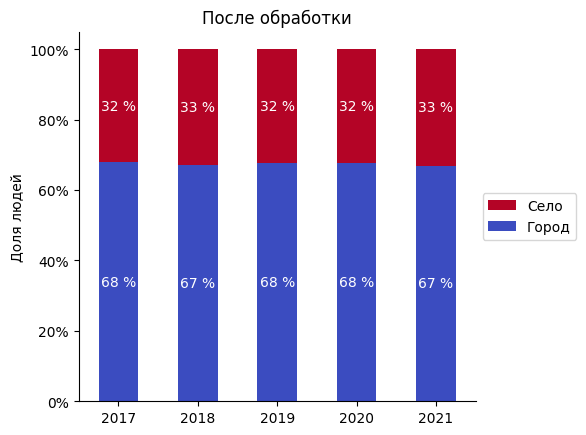

In [401]:
p = final_data_without_nan.pivot_table(index='year', columns='city_status_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('После обработки')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

In [402]:
city_status_dict_before = {1 : 'Областной центр', 2 : 'Город', 3 : 'ПГТ', 4 : 'Село'}
final_data_without_nan['city_status_cat_before'] = final_data_without_nan['city_status'].map(city_status_dict_before).astype('category')
final_data_without_nan['city_status_cat_before'] = final_data_without_nan['city_status_cat_before'].cat.set_categories(list(city_status_dict_before.values())[0:], ordered=True)

In [403]:
final_data_without_nan['city_status_cat_before'].unique()

['ПГТ', 'Село', 'Областной центр', 'Город']
Categories (4, object): ['Областной центр' < 'Город' < 'ПГТ' < 'Село']

In [404]:
final_data_without_nan['city_status_cat_before'].describe()

count               28280
unique                  4
top       Областной центр
freq                11348
Name: city_status_cat_before, dtype: object

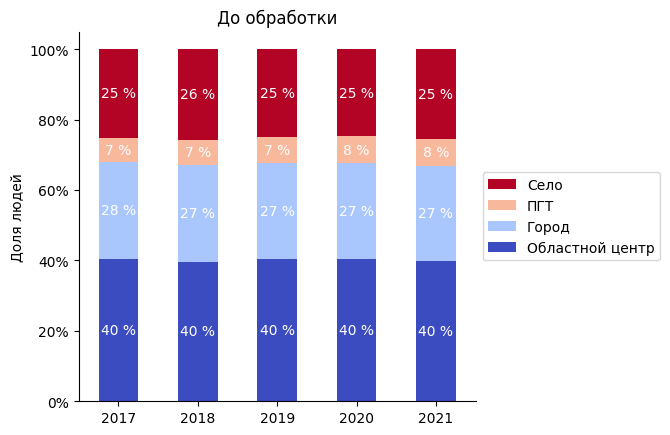

In [405]:
p = final_data_without_nan.pivot_table(index='year', columns='city_status_cat_before', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('До обработки')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

# Put a legend to the right of the current axis
ax.legend([h[3], h[2], h[1], h[0]], [l[3], l[2], l[1], l[0]],loc='center left', bbox_to_anchor=(1, 0.5))

### Распределение населения по семейному статусу 2017-2021 до преобразований

In [406]:
final_data_without_nan['marst'].unique()

array([2., 5., 4., 1., 3., 6.])

In [407]:
final_data_without_nan['marst'].describe()

count   28280.00
mean        2.79
std         1.21
min         1.00
25%         2.00
50%         2.00
75%         4.00
max         6.00
Name: marst, dtype: float64

In [408]:
marst_dict_before = {1 : 'Никогда в браке не состоял(a)', 
                     2 : 'Состоит в зарегистрированном браке', 
                     3 : 'Совместное проживание без брака', 
                     4 : 'Разведен(а)',
                     5 : 'Вдовец(вдова)',
                     6 : 'В браке, раздельное проживание',
                     7 : 'Состоит в гражданском браке'}
final_data_without_nan['marst_before'] = final_data_without_nan['marst'].map(marst_dict_before).astype('category')
final_data_without_nan['marst_before'] = final_data_without_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [409]:
final_data_without_nan['marst_before'].unique()

['Состоит в зарегистрированном браке', 'Вдовец(вдова)', 'Разведен(а)', 'Никогда в браке не состоял(a)', 'Совместное проживание без брака', 'В браке, раздельное проживание']
Categories (7, object): ['Никогда в браке не состоял(a)' < 'Состоит в зарегистрированном браке' < 'Совместное проживание без брака' < 'Разведен(а)' < 'Вдовец(вдова)' < 'В браке, раздельное проживание' < 'Состоит в гражданском браке']

In [410]:
final_data_without_nan['marst_before'].describe()

count                                  28280
unique                                     6
top       Состоит в зарегистрированном браке
freq                                   16171
Name: marst_before, dtype: object

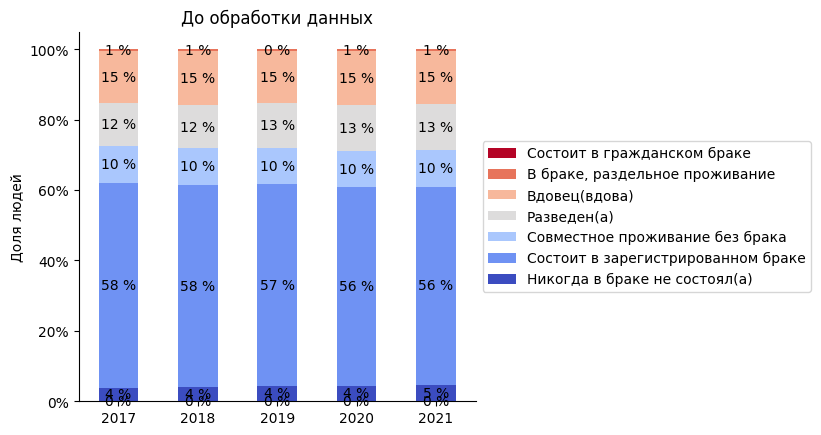

In [411]:
p = final_data_without_nan.pivot_table(index='year', columns='marst_before', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('До обработки данных')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center') 
            #color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[3], h[2], h[1], h[0]], [l[3], l[2], l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[6], h[5], h[4], h[3], h[2], h[1], h[0]], [l[6], l[5], l[4], l[3], l[2], l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

In [412]:
final_data_without_nan['marst'].unique()

array([2., 5., 4., 1., 3., 6.])

In [413]:
final_data_without_nan['marst'].describe()

count   28280.00
mean        2.79
std         1.21
min         1.00
25%         2.00
50%         2.00
75%         4.00
max         6.00
Name: marst, dtype: float64

In [414]:
marst_dict = {1 : 'Нет партнёра', 
              2 : 'Есть партнёр', 
              3 : 'Есть партнёр', 
              4 : 'Нет партнёра',
              5 : 'Нет партнёра',
              6 : 'Нет партнёра',
              7 : 'Есть партнёр'}
final_data_without_nan['partner'] = final_data_without_nan['marst'].map(marst_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [415]:
final_data_without_nan['partner'].unique()

['Есть партнёр', 'Нет партнёра']
Categories (2, object): ['Есть партнёр', 'Нет партнёра']

In [416]:
final_data_without_nan['partner'].describe()

count            28280
unique               2
top       Есть партнёр
freq             19085
Name: partner, dtype: object

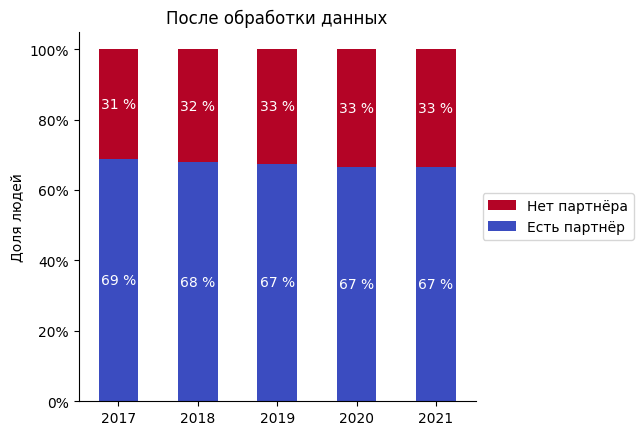

In [417]:
p = final_data_without_nan.pivot_table(index='year', columns='partner', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('После обработки данных')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

### Распределение населения по наличию несовершеннолетнего внука 2017-2021

In [418]:
final_data_without_nan['infant_vnuk'].describe()

count   28280.00
mean        0.12
std         0.32
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: infant_vnuk, dtype: float64

In [419]:
final_data_without_nan['infant_vnuk'].unique()

array([0, 1])

In [420]:
infant_vnuk_dict = {0 : 'Есть несовершеннолетний внук', 
                    1 : 'Нет несовершеннолетнего внука'}

final_data_without_nan['infant_vnuk_cat'] = final_data_without_nan['infant_vnuk'].map(infant_vnuk_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

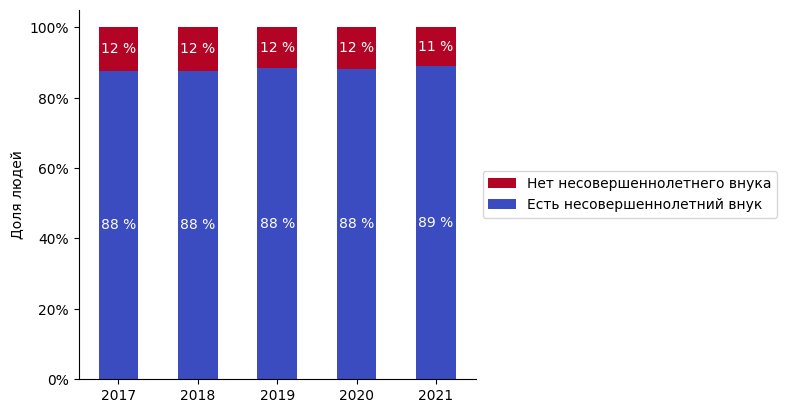

In [421]:
p = final_data_without_nan.pivot_table(index='year', columns='infant_vnuk_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

### Графики распределения объективных оценок здоровья

#### Хирургическая операция в течение 12 месяцев

In [422]:
final_data_without_nan['operation'].unique()

array([1., 2.])

In [423]:
operation_dict = {1 : 'Была операция', 
                  2 : 'Не было операции'}

final_data_without_nan['operation_cat'] = final_data_without_nan['operation'].map(operation_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [424]:
final_data_without_nan['operation_cat'].unique()

['Была операция', 'Не было операции']
Categories (2, object): ['Была операция', 'Не было операции']

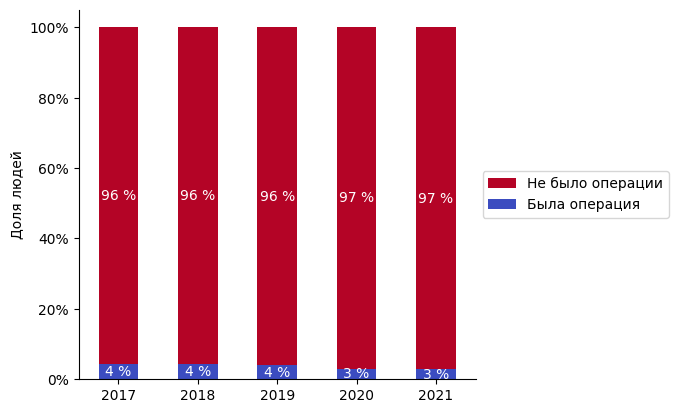

In [425]:
p = final_data_without_nan.pivot_table(index='year', columns='operation_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания лёгких

In [426]:
final_data_without_nan['chron_lungs'].unique()

array([2., 1.])

In [427]:
chron_lungs_dict = {1 : 'Есть', 
                    2 : 'Нет'}

final_data_without_nan['chron_lungs_cat'] = final_data_without_nan['chron_lungs'].map(chron_lungs_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [428]:
final_data_without_nan['chron_lungs_cat']

4        Нет
6        Нет
10       Нет
16       Нет
22       Нет
        ... 
90548    Нет
90549    Нет
90550    Нет
90551    Нет
90552    Нет
Name: chron_lungs_cat, Length: 28280, dtype: category
Categories (2, object): ['Есть', 'Нет']

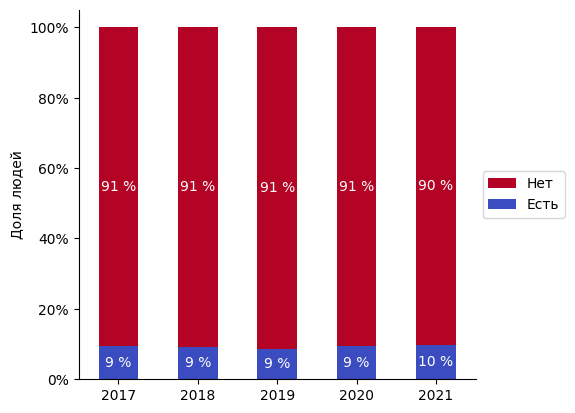

In [429]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_lungs_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания сердца

In [430]:
final_data_without_nan['chron_heart'].unique()

array([2., 1.])

In [431]:
chron_heart_dict = {1 : 'Есть', 
                    2 : 'Нет'}

final_data_without_nan['chron_heart_cat'] = final_data_without_nan['chron_heart'].map(chron_heart_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [432]:
final_data_without_nan['chron_heart_cat'].unique()

['Нет', 'Есть']
Categories (2, object): ['Есть', 'Нет']

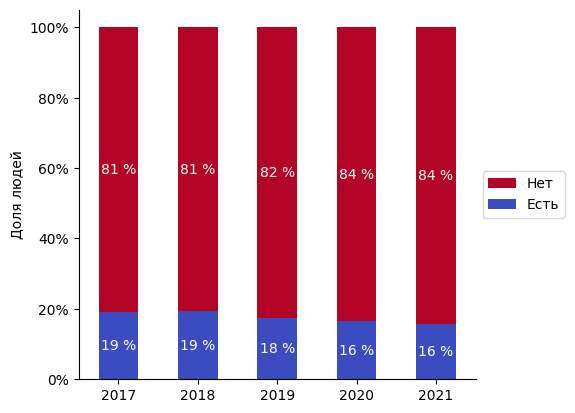

In [433]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_heart_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания печени

In [434]:
final_data_without_nan['chron_liver'].unique()

array([2., 1.])

In [435]:
chron_liver_dict = {1 : 'Есть', 
                    2 : 'Нет'}

final_data_without_nan['chron_liver_cat'] = final_data_without_nan['chron_liver'].map(chron_liver_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [436]:
final_data_without_nan['chron_liver_cat']

4         Нет
6         Нет
10       Есть
16        Нет
22        Нет
         ... 
90548     Нет
90549     Нет
90550     Нет
90551     Нет
90552     Нет
Name: chron_liver_cat, Length: 28280, dtype: category
Categories (2, object): ['Есть', 'Нет']

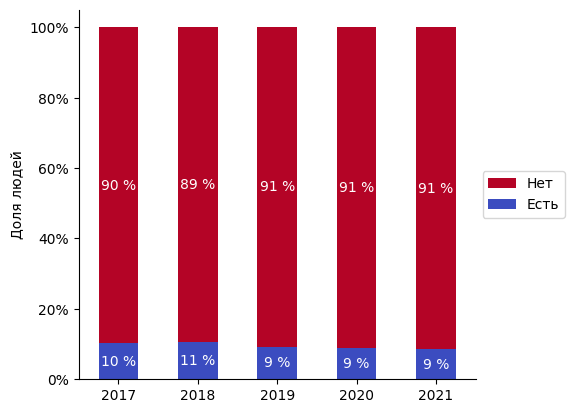

In [437]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_liver_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания почек

In [438]:
final_data_without_nan['chron_kidneys'].unique()

array([2., 1.])

In [439]:
chron_kidneys_dict = {1 : 'Есть', 
                    2 : 'Нет'}

final_data_without_nan['chron_kidneys_cat'] = final_data_without_nan['chron_kidneys'].map(chron_kidneys_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

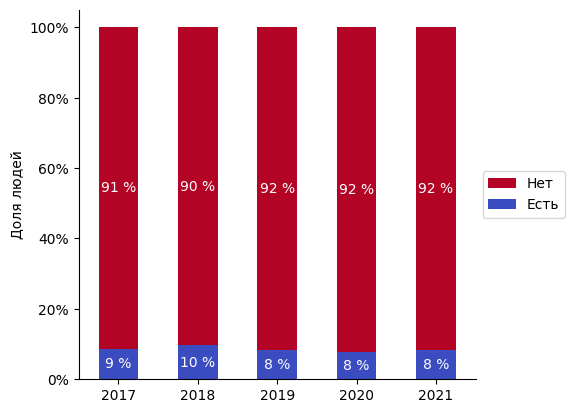

In [440]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_kidneys_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания ЖКТ

In [441]:
final_data_without_nan['chron_gastro'].unique()

array([2., 1.])

In [442]:
chron_gastro_dict = {1 : 'Есть', 
                      2 : 'Нет'}

final_data_without_nan['chron_gastro_cat'] = final_data_without_nan['chron_gastro'].map(chron_gastro_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [443]:
final_data_without_nan['chron_gastro_cat'].unique()

['Нет', 'Есть']
Categories (2, object): ['Есть', 'Нет']

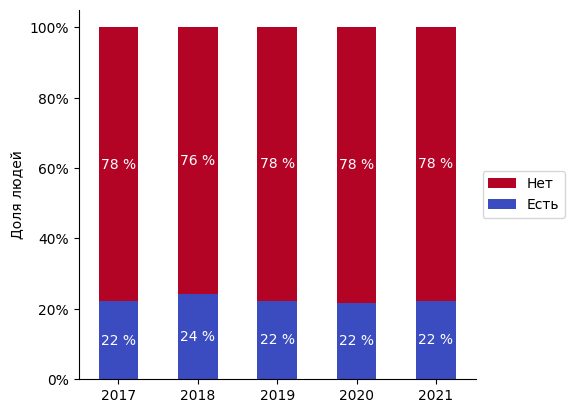

In [444]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_gastro_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания позвоночника

In [445]:
final_data_without_nan['chron_spine'].unique()

array([2., 1.])

In [446]:
chron_spine_dict = {1 : 'Есть', 
                     2 : 'Нет'}

final_data_without_nan['chron_spine_cat'] = final_data_without_nan['chron_spine'].map(chron_spine_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

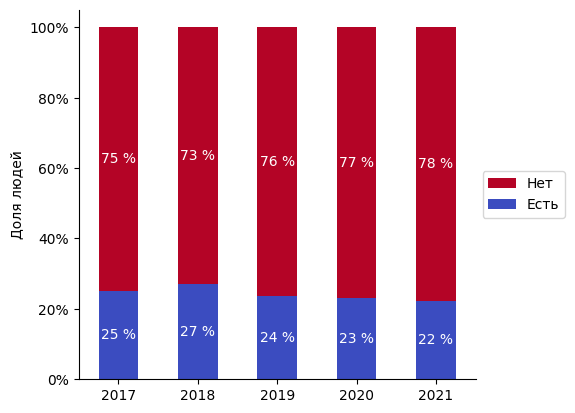

In [447]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_spine_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Хронические заболевания ДРУГИЕ

In [448]:
final_data_without_nan['chron_other'].unique()

array([2., 1.])

In [449]:
chron_other_dict = {1 : 'Есть', 
                    2 : 'Нет'}

final_data_without_nan['chron_other_cat'] = final_data_without_nan['chron_other'].map(chron_other_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [450]:
final_data_without_nan['chron_other_cat'].unique()

['Нет', 'Есть']
Categories (2, object): ['Есть', 'Нет']

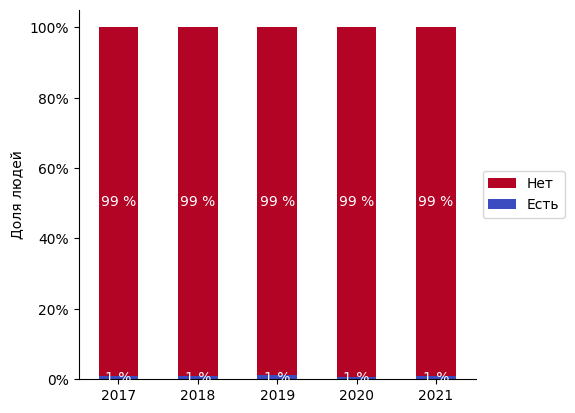

In [451]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_other_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Наличие инвалидности

In [452]:
final_data_without_nan['disabled'].unique()

array([2., 1.])

In [453]:
final_data_without_nan['disabled'].describe()

count   28280.00
mean        1.89
std         0.31
min         1.00
25%         2.00
50%         2.00
75%         2.00
max         2.00
Name: disabled, dtype: float64

In [454]:
final_data_without_nan['disabled'].unique()

array([2., 1.])

In [455]:
disabled_dict = {1 : 'Есть инвалидность', 
                 2 : 'Нет инвалидности'}

final_data_without_nan['chron_disabled_cat'] = final_data_without_nan['disabled'].map(disabled_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

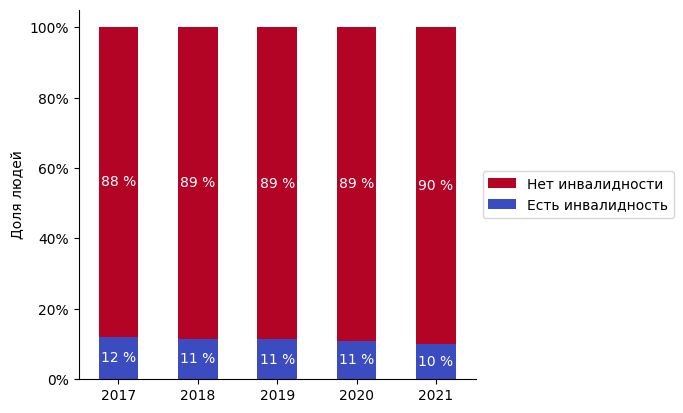

In [456]:
p = final_data_without_nan.pivot_table(index='year', columns='chron_disabled_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Наличие инсульта

In [457]:
final_data_without_nan['insult'].unique()

array([2., 1.])

In [458]:
insult_dict = {1 : 'Был инсульт', 
               2 : 'Не было инсульта'}

final_data_without_nan['insult_cat'] = final_data_without_nan['insult'].map(insult_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [459]:
final_data_without_nan['insult_cat'].unique()

['Не было инсульта', 'Был инсульт']
Categories (2, object): ['Был инсульт', 'Не было инсульта']

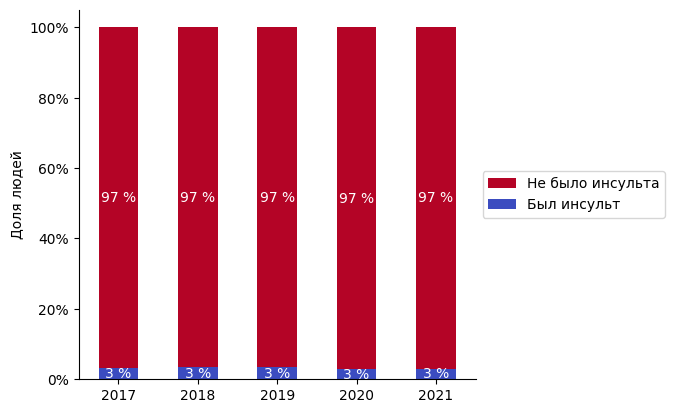

In [460]:
p = final_data_without_nan.pivot_table(index='year', columns='insult_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Наличие инфаркта

In [461]:
final_data_without_nan['infarkt']

4       2.00
6       2.00
10      2.00
16      2.00
22      2.00
        ... 
90548   2.00
90549   2.00
90550   2.00
90551   1.00
90552   2.00
Name: infarkt, Length: 28280, dtype: float64

In [462]:
final_data_without_nan['infarkt'].unique()

array([2., 1.])

In [463]:
infarkt_dict = {1 : 'Был инфаркт', 
                2 : 'Не было инфаркта'}

final_data_without_nan['infarkt_cat'] = final_data_without_nan['infarkt'].map(infarkt_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [464]:
final_data_without_nan['infarkt_cat']

4        Не было инфаркта
6        Не было инфаркта
10       Не было инфаркта
16       Не было инфаркта
22       Не было инфаркта
               ...       
90548    Не было инфаркта
90549    Не было инфаркта
90550    Не было инфаркта
90551         Был инфаркт
90552    Не было инфаркта
Name: infarkt_cat, Length: 28280, dtype: category
Categories (2, object): ['Был инфаркт', 'Не было инфаркта']

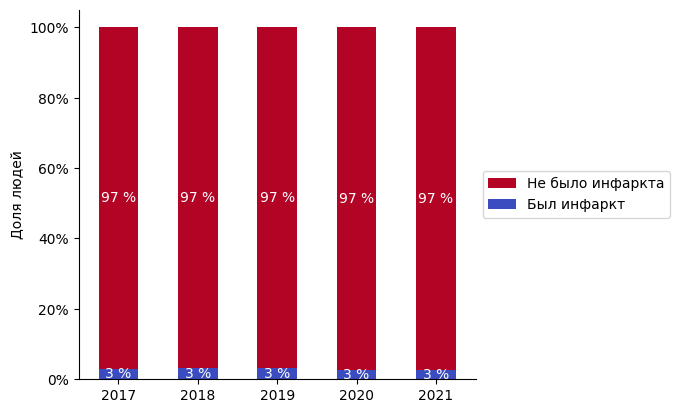

In [465]:
p = final_data_without_nan.pivot_table(index='year', columns='infarkt_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Наличие диабета

In [466]:
final_data_without_nan['diabet'].unique()

array([2., 1.])

In [467]:
final_data_without_nan['diabet'].describe()

count   28280.00
mean        1.89
std         0.31
min         1.00
25%         2.00
50%         2.00
75%         2.00
max         2.00
Name: diabet, dtype: float64

In [468]:
diabet_dict = {1 : 'Есть дибет', 
               2 : 'Нет диабета'}

final_data_without_nan['diabet_cat'] = final_data_without_nan['diabet'].map(diabet_dict).astype('category')
#data_with_nan['partner'] = data_with_nan['marst_before'].cat.set_categories(list(marst_dict_before.values())[0:], ordered=True)

In [469]:
final_data_without_nan['diabet_cat']

4        Нет диабета
6         Есть дибет
10       Нет диабета
16       Нет диабета
22       Нет диабета
            ...     
90548    Нет диабета
90549    Нет диабета
90550    Нет диабета
90551    Нет диабета
90552    Нет диабета
Name: diabet_cat, Length: 28280, dtype: category
Categories (2, object): ['Есть дибет', 'Нет диабета']

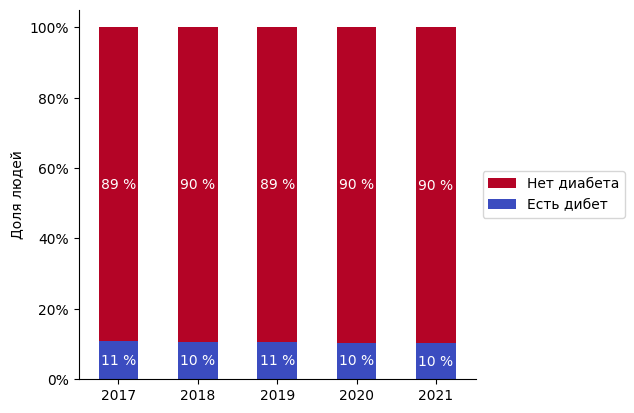

In [470]:
p = final_data_without_nan.pivot_table(index='year', columns='diabet_cat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Доля людей')
plt.title('')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white')
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

h, l = plt.gca().get_legend_handles_labels()

#[h[1], h[0]], [l[1], l[0]]

# Put a legend to the right of the current axis
ax.legend([h[1], h[0]], [l[1], l[0]], loc='center left', bbox_to_anchor=(1, 0.5))

#### Отбор финального датасета

In [471]:
data_preparing = final_data_without_nan

In [472]:
data_preparing.columns

Index(['id_w', 'idind', 'id_i', 'year', 'employed', 'age', 'sex', 'diplom',
       'marst', 'pension', 'city_status', 'hhld_size', 'infant_vnuk',
       'health_slfstm', 'disabled', 'operation', 'diabet', 'infarkt', 'insult',
       'chron_heart', 'chron_lungs', 'chron_liver', 'chron_kidneys',
       'chron_gastro', 'chron_spine', 'chron_other', 'agecat',
       'hhld_size_celaned', 'hhld_size_celaned_cat', 'diplom_labeled',
       'educ_group', 'healthcat', 'healthcat_before', 'employed_cat',
       'sex_cat', 'pension_cat', 'city_status_cat', 'city_status_cat_before',
       'marst_before', 'partner', 'infant_vnuk_cat', 'operation_cat',
       'chron_lungs_cat', 'chron_heart_cat', 'chron_liver_cat',
       'chron_kidneys_cat', 'chron_gastro_cat', 'chron_spine_cat',
       'chron_other_cat', 'chron_disabled_cat', 'insult_cat', 'infarkt_cat',
       'diabet_cat'],
      dtype='object')

In [474]:
data_for_model = data_preparing[[
       'id_w', 'idind', 'id_i', 'year', 
       'employed_cat', #добавить 1/0
       'pension_cat', #добавить 1/0
       'agecat', 
       'sex_cat', 
       'educ_group',
       'partner',  
       'city_status_cat', #добавить 1/0
       'hhld_size_celaned', 
       'infant_vnuk_cat', #добавить 1/0
       'healthcat', 
       'disabled', #поменять на 1/0 все ниже
       'operation', 
       'diabet', 
       'infarkt', 
       'insult',
       'chron_heart', 
       'chron_lungs', 
       'chron_liver', 
       'chron_kidneys',
       'chron_gastro', 
       'chron_spine', 
       'chron_other'
]]

In [475]:
data_for_model.head()

,id_w,idind,id_i,year,employed_cat,pension_cat,agecat,sex_cat,educ_group,partner,...,diabet,infarkt,insult,chron_heart,chron_lungs,chron_liver,chron_kidneys,chron_gastro,chron_spine,chron_other
4,26,9,1000401.00,2017,Безработный,Есть пенсия,65-72,Женщина,Среднее профессиональное,Есть партнёр,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
6,26,3,1001201.00,2017,Трудоустроен,Есть пенсия,60-64,Женщина,Среднее общее,Нет партнёра,...,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
10,26,25031,1001401.00,2017,Безработный,Есть пенсия,65-72,Женщина,Высшее,Нет партнёра,...,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00
16,26,29,1002102.00,2017,Безработный,Нет пенсии,45-49,Женщина,Среднее общее,Нет партнёра,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
22,26,37,1002402.00,2017,Трудоустроен,Есть пенсия,60-64,Мужчина,Среднее общее,Есть партнёр,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


In [476]:
data_for_model_changing = data_for_model

In [477]:
data_for_model_changing.head()

,id_w,idind,id_i,year,employed_cat,pension_cat,agecat,sex_cat,educ_group,partner,...,diabet,infarkt,insult,chron_heart,chron_lungs,chron_liver,chron_kidneys,chron_gastro,chron_spine,chron_other
4,26,9,1000401.00,2017,Безработный,Есть пенсия,65-72,Женщина,Среднее профессиональное,Есть партнёр,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
6,26,3,1001201.00,2017,Трудоустроен,Есть пенсия,60-64,Женщина,Среднее общее,Нет партнёра,...,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
10,26,25031,1001401.00,2017,Безработный,Есть пенсия,65-72,Женщина,Высшее,Нет партнёра,...,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00
16,26,29,1002102.00,2017,Безработный,Нет пенсии,45-49,Женщина,Среднее общее,Нет партнёра,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
22,26,37,1002402.00,2017,Трудоустроен,Есть пенсия,60-64,Мужчина,Среднее общее,Есть партнёр,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


In [478]:
data_for_model_changing['id_i'] = data_for_model_changing['id_i'].astype(int)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/793327362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['id_i'] = data_for_model_changing['id_i'].astype(int)


In [479]:
data_for_model_changing['id_i']

4           1000401
6           1001201
10          1001401
16          1002102
22          1002402
            ...    
90548    1429001501
90549    1429001502
90550    1429001601
90551    1429001602
90552    1429001701
Name: id_i, Length: 28280, dtype: int64

In [481]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['employed_cat'] == 'Трудоустроен'),
    (data_for_model_changing['employed_cat'] == 'Безработный')
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['employed'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/4269763302.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['employed'] = np.select(conditions, values)


In [482]:
data_for_model_changing['employed']

4        0
6        1
10       0
16       0
22       1
        ..
90548    0
90549    0
90550    1
90551    0
90552    0
Name: employed, Length: 28280, dtype: int64

In [483]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['pension_cat'] == 'Есть пенсия'),
    (data_for_model_changing['pension_cat'] == 'Нет пенсии')
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['pension'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2366027537.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['pension'] = np.select(conditions, values)


In [484]:
data_for_model_changing['pension']

4        1
6        1
10       1
16       0
22       1
        ..
90548    1
90549    0
90550    1
90551    1
90552    1
Name: pension, Length: 28280, dtype: int64

In [485]:
data_for_model_changing['city_status_cat']

4         Село
6         Село
10        Село
16        Село
22        Село
         ...  
90548     Село
90549     Село
90550    Город
90551    Город
90552    Город
Name: city_status_cat, Length: 28280, dtype: category
Categories (2, object): ['Город', 'Село']

In [486]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['city_status_cat'] == 'Город'),
    (data_for_model_changing['city_status_cat'] == 'Село')
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['city_status'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3060201061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['city_status'] = np.select(conditions, values)


In [489]:
data_for_model_changing['city_status']

4        0
6        0
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    1
90551    1
90552    1
Name: city_status, Length: 28280, dtype: int64

In [490]:
data_for_model_changing['infant_vnuk_cat']

4         Есть несовершеннолетний внук
6         Есть несовершеннолетний внук
10        Есть несовершеннолетний внук
16        Есть несовершеннолетний внук
22       Нет несовершеннолетнего внука
                     ...              
90548     Есть несовершеннолетний внук
90549     Есть несовершеннолетний внук
90550     Есть несовершеннолетний внук
90551     Есть несовершеннолетний внук
90552     Есть несовершеннолетний внук
Name: infant_vnuk_cat, Length: 28280, dtype: category
Categories (2, object): ['Есть несовершеннолетний внук', 'Нет несовершеннолетнего внука']

In [491]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['infant_vnuk_cat'] == 'Есть несовершеннолетний внук'),
    (data_for_model_changing['infant_vnuk_cat'] == 'Нет несовершеннолетнего внука')
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['infant_vnuk'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/723242511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['infant_vnuk'] = np.select(conditions, values)


In [492]:
data_for_model_changing['infant_vnuk']

4        1
6        1
10       1
16       1
22       0
        ..
90548    1
90549    1
90550    1
90551    1
90552    1
Name: infant_vnuk, Length: 28280, dtype: int64

In [493]:
data_for_model_changing['disabled']

4       2.00
6       1.00
10      2.00
16      2.00
22      2.00
        ... 
90548   2.00
90549   2.00
90550   2.00
90551   1.00
90552   1.00
Name: disabled, Length: 28280, dtype: float64

In [494]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['disabled'] == 1),
    (data_for_model_changing['disabled'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['disabled_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/987407634.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['disabled_indicator'] = np.select(conditions, values)


In [495]:
data_for_model_changing['disabled_indicator']

4        0
6        1
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    0
90551    1
90552    1
Name: disabled_indicator, Length: 28280, dtype: int64

In [496]:
data_for_model_changing['operation']

4       1.00
6       2.00
10      2.00
16      2.00
22      2.00
        ... 
90548   2.00
90549   2.00
90550   2.00
90551   2.00
90552   2.00
Name: operation, Length: 28280, dtype: float64

In [497]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['operation'] == 1),
    (data_for_model_changing['operation'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['operation_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/1862231976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['operation_indicator'] = np.select(conditions, values)


In [498]:
data_for_model_changing['operation_indicator']

4        1
6        0
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    0
90551    0
90552    0
Name: operation_indicator, Length: 28280, dtype: int64

In [499]:
data_for_model_changing['diabet']

4       2.00
6       1.00
10      2.00
16      2.00
22      2.00
        ... 
90548   2.00
90549   2.00
90550   2.00
90551   2.00
90552   2.00
Name: diabet, Length: 28280, dtype: float64

In [500]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['diabet'] == 1),
    (data_for_model_changing['diabet'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['diabet_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2964791287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['diabet_indicator'] = np.select(conditions, values)


In [501]:
data_for_model_changing['diabet_indicator']

4        0
6        1
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    0
90551    0
90552    0
Name: diabet_indicator, Length: 28280, dtype: int64

In [502]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['infarkt'] == 1),
    (data_for_model_changing['infarkt'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['infarkt_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/4239681989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['infarkt_indicator'] = np.select(conditions, values)


In [503]:
data_for_model_changing['infarkt_indicator']

4        0
6        0
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    0
90551    1
90552    0
Name: infarkt_indicator, Length: 28280, dtype: int64

In [504]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['insult'] == 1),
    (data_for_model_changing['insult'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['insult_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2432283650.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['insult_indicator'] = np.select(conditions, values)


In [505]:
data_for_model_changing['insult_indicator']

4        0
6        0
10       0
16       0
22       0
        ..
90548    0
90549    0
90550    0
90551    1
90552    0
Name: insult_indicator, Length: 28280, dtype: int64

In [506]:
data_for_model_changing['chron_heart']

4       2.00
6       2.00
10      1.00
16      2.00
22      2.00
        ... 
90548   2.00
90549   2.00
90550   2.00
90551   1.00
90552   2.00
Name: chron_heart, Length: 28280, dtype: float64

In [507]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_heart'] == 1),
    (data_for_model_changing['chron_heart'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_heart_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2996262170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_heart_indicator'] = np.select(conditions, values)


In [508]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_lungs'] == 1),
    (data_for_model_changing['chron_lungs'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_lungs_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/84910838.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_lungs_indicator'] = np.select(conditions, values)


In [510]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_liver'] == 1),
    (data_for_model_changing['chron_liver'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_liver_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/17837992.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_liver_indicator'] = np.select(conditions, values)


In [511]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_kidneys'] == 1),
    (data_for_model_changing['chron_kidneys'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_kidneys_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/948565502.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_kidneys_indicator'] = np.select(conditions, values)


In [512]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_gastro'] == 1),
    (data_for_model_changing['chron_gastro'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_gastro_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/4062389747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_gastro_indicator'] = np.select(conditions, values)


In [513]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_spine'] == 1),
    (data_for_model_changing['chron_spine'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_spine_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/279564350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_spine_indicator'] = np.select(conditions, values)


In [514]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['chron_other'] == 1),
    (data_for_model_changing['chron_other'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['chron_other_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/316331579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['chron_other_indicator'] = np.select(conditions, values)


In [517]:
data_for_model_changing['partner']

4        Есть партнёр
6        Нет партнёра
10       Нет партнёра
16       Нет партнёра
22       Есть партнёр
             ...     
90548    Нет партнёра
90549    Нет партнёра
90550    Есть партнёр
90551    Есть партнёр
90552    Нет партнёра
Name: partner, Length: 28280, dtype: category
Categories (2, object): ['Есть партнёр', 'Нет партнёра']

In [518]:
# create a list of our conditions
conditions = [
    (data_for_model_changing['partner'] == 'Есть партнёр'),
    (data_for_model_changing['partner'] == 'Нет партнёра')
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
data_for_model_changing['partner_indicator'] = np.select(conditions, values)

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2373348149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model_changing['partner_indicator'] = np.select(conditions, values)


In [519]:
data_for_model_changing.columns

Index(['id_w', 'idind', 'id_i', 'year', 'employed_cat', 'pension_cat',
       'agecat', 'sex_cat', 'educ_group', 'partner', 'city_status_cat',
       'hhld_size_celaned', 'infant_vnuk_cat', 'healthcat', 'disabled',
       'operation', 'diabet', 'infarkt', 'insult', 'chron_heart',
       'chron_lungs', 'chron_liver', 'chron_kidneys', 'chron_gastro',
       'chron_spine', 'chron_other', 'employed', 'pension', 'city_status',
       'infant_vnuk', 'disabled_indicator', 'operation_indicator',
       'diabet_indicator', 'infarkt_indicator', 'insult_indicator',
       'chron_heart_indicator', 'chron_lungs_indicator',
       'chron_liver_indicator', 'chron_kidneys_indicator',
       'chron_gastro_indicator', 'chron_spine_indicator',
       'chron_other_indicator', 'partner_indicator'],
      dtype='object')

In [522]:
data_for_model = data_for_model_changing[[
                           'year',
                           'id_w',
                           'id_i',
                           'idind',
                           'employed', #1/0 работает нет
                           'pension',  #1/0 есть нет
                           'agecat',
                           'sex_cat',
                           'educ_group',
                           'partner_indicator', #1/0 есть нет партнёра
                           'city_status', #если в городе
                           'hhld_size_celaned',
                           'infant_vnuk', #если есть несоверш внук
                           'healthcat',     
                           'disabled_indicator', 
                           'operation_indicator',
                           'diabet_indicator', 
                           'infarkt_indicator', 
                           'insult_indicator',
                           'chron_heart_indicator', 
                           'chron_lungs_indicator',
                           'chron_liver_indicator', 
                           'chron_kidneys_indicator',
                           'chron_gastro_indicator', 
                           'chron_spine_indicator',
                           'chron_other_indicator'
                           ]]

In [728]:
data_for_model.columns

Index(['year', 'id_w', 'id_i', 'idind', 'employed', 'pension', 'agecat',
       'sex_cat', 'educ_group', 'partner_indicator', 'city_status',
       'hhld_size_celaned', 'infant_vnuk', 'healthcat', 'disabled_indicator',
       'operation_indicator', 'diabet_indicator', 'infarkt_indicator',
       'insult_indicator', 'chron_heart_indicator', 'chron_lungs_indicator',
       'chron_liver_indicator', 'chron_kidneys_indicator',
       'chron_gastro_indicator', 'chron_spine_indicator',
       'chron_other_indicator', 'percent_operation', 'percent_insult',
       'percent_diabet', 'percent_infarkt', 'percent_disabled'],
      dtype='object')

In [729]:
data_to_stata = data_for_model[['year', 'id_w', 'id_i', 'idind', 'employed', 'pension', 'agecat',
       'sex_cat', 'educ_group', 'partner_indicator', 'city_status',
       'hhld_size_celaned', 'infant_vnuk', 'healthcat', 'disabled_indicator',
       'operation_indicator', 'diabet_indicator', 'infarkt_indicator',
       'insult_indicator', 'chron_heart_indicator', 'chron_lungs_indicator',
       'chron_liver_indicator', 'chron_kidneys_indicator',
       'chron_gastro_indicator', 'chron_spine_indicator',
       'chron_other_indicator']]

In [730]:
data_to_stata.head()

,year,id_w,id_i,idind,employed,pension,agecat,sex_cat,educ_group,partner_indicator,...,diabet_indicator,infarkt_indicator,insult_indicator,chron_heart_indicator,chron_lungs_indicator,chron_liver_indicator,chron_kidneys_indicator,chron_gastro_indicator,chron_spine_indicator,chron_other_indicator
4,2017,26,1000401,9,0,1,65-72,Женщина,Среднее профессиональное,1,...,0,0,0,0,0,0,0,0,0,0
6,2017,26,1001201,3,1,1,60-64,Женщина,Среднее общее,0,...,1,0,0,0,0,0,0,1,0,0
10,2017,26,1001401,25031,0,1,65-72,Женщина,Высшее,0,...,0,0,0,1,0,1,1,0,0,0
16,2017,26,1002102,29,0,0,45-49,Женщина,Среднее общее,0,...,0,0,0,0,0,0,0,1,0,0
22,2017,26,1002402,37,1,1,60-64,Мужчина,Среднее общее,1,...,0,0,0,0,0,0,0,0,0,0


In [742]:
mask_cc = ((data_for_model['year'] == 2021))
data_to_stata[mask_cc].describe()

,year,id_w,id_i,idind,employed,pension,partner_indicator,city_status,hhld_size_celaned,infant_vnuk,...,diabet_indicator,infarkt_indicator,insult_indicator,chron_heart_indicator,chron_lungs_indicator,chron_liver_indicator,chron_kidneys_indicator,chron_gastro_indicator,chron_spine_indicator,chron_other_indicator
count,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,...,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00,5729.00
mean,2021.00,30.00,124394837.41,32857.95,0.50,0.58,0.67,0.67,2.76,0.89,...,0.10,0.03,0.03,0.16,0.10,0.09,0.08,0.22,0.22,0.01
std,0.00,0.00,232645896.26,17989.42,0.50,0.49,0.47,0.47,1.39,0.31,...,0.30,0.16,0.17,0.36,0.30,0.28,0.28,0.42,0.42,0.10
min,2021.00,30.00,1000101.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2021.00,30.00,47607301.00,18030.00,0.00,0.00,0.00,0.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2021.00,30.00,77014501.00,34530.00,1.00,1.00,1.00,1.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2021.00,30.00,135015201.00,48009.00,1.00,1.00,1.00,1.00,4.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2021.00,30.00,1429001701.00,61446.00,1.00,1.00,1.00,1.00,7.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [733]:
data_to_stata.to_csv('data_to_stata.csv',encoding='utf8', index=False)

### Распределение здоровья по возрасту у мужчин 2017-2019 гг.

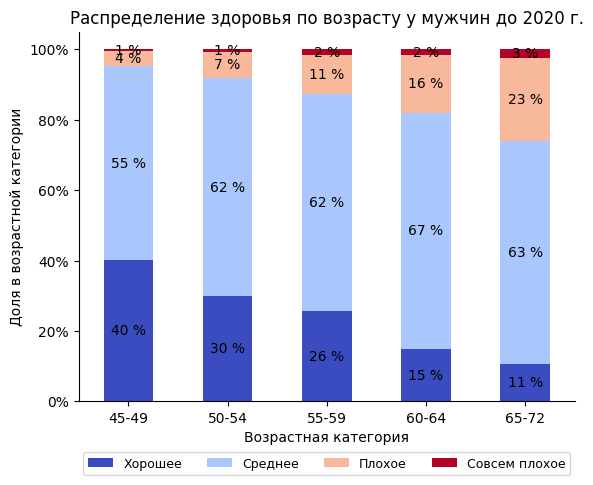

In [708]:
mask = ((data_for_model['sex_cat']=='Мужчина') & (data_for_model['year'] <= 2019)) #отбираем только мужчин
#stacked_health_year_man_2017 = df_ind_selected[(df_ind_selected['h5']=='1') & (df_ind_selected['year']>=2017)]
p = data_for_model[mask].pivot_table(index='agecat', columns='healthcat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('Возрастная категория')
plt.ylabel('Доля в возрастной категории')
plt.title('Распределение здоровья по возрасту у мужчин до 2020 г.')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

### Распределение здоровья по возрасту у мужчин 2020-2021 гг.

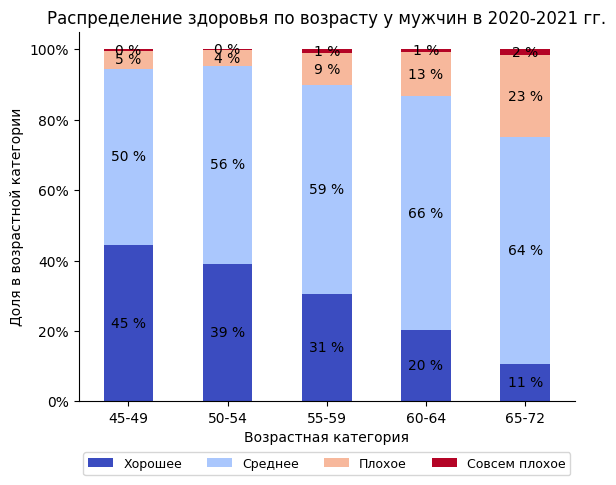

In [709]:
mask = ((data_for_model['sex_cat']=='Мужчина') & (data_for_model['year'] >= 2020)) #отбираем только мужчин
#stacked_health_year_man_2017 = df_ind_selected[(df_ind_selected['h5']=='1') & (df_ind_selected['year']>=2017)]
p = data_for_model[mask].pivot_table(index='agecat', columns='healthcat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('Возрастная категория')
plt.ylabel('Доля в возрастной категории')
plt.title('Распределение здоровья по возрасту у мужчин в 2020-2021 гг.')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

### Распределение здоровья по возрасту у женщин до 2020 г.

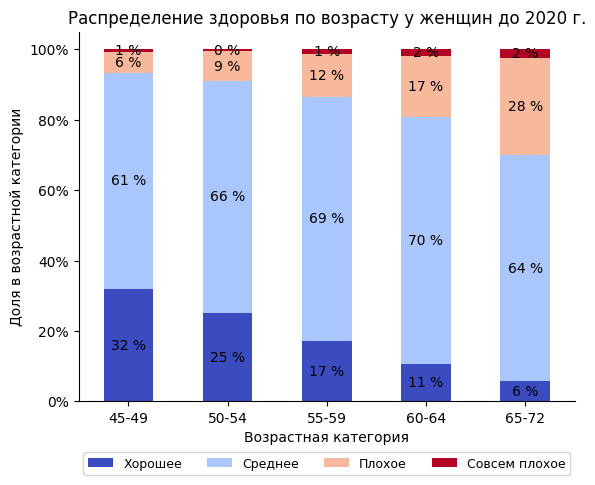

In [710]:
mask = ((data_for_model['sex_cat']=='Женщина') & (data_for_model['year'] <= 2019))#отбираем только мужчин
#stacked_health_year_man_2017 = df_ind_selected[(df_ind_selected['h5']=='1') & (df_ind_selected['year']>=2017)]
p = data_for_model[mask].pivot_table(index='agecat', columns='healthcat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('Возрастная категория')
plt.ylabel('Доля в возрастной категории')
plt.title('Распределение здоровья по возрасту у женщин до 2020 г.')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

### Распределение здоровья по возрасту у женщин в 2020-2021 гг.

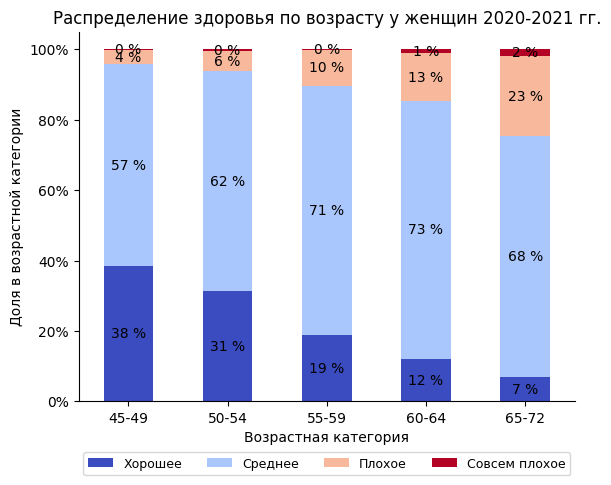

In [711]:
mask = ((data_for_model['sex_cat']=='Женщина') & (data_for_model['year'] >= 2020))#отбираем только мужчин
#stacked_health_year_man_2017 = df_ind_selected[(df_ind_selected['h5']=='1') & (df_ind_selected['year']>=2017)]
p = data_for_model[mask].pivot_table(index='agecat', columns='healthcat', values='idind', aggfunc='count')
t = p.sum(axis=1)
ax = p.divide(t, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=0)
plt.xlabel('Возрастная категория')
plt.ylabel('Доля в возрастной категории')
plt.title('Распределение здоровья по возрасту у женщин 2020-2021 гг.')
for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

### Уровень занятости мужчин с различной самооценкой здоровья

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/1225275042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/1225275042.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)


Text(0.5, 1.0, 'Уровень занятости у мужчин в зависимости от самооценки здоровья 2017-2021')

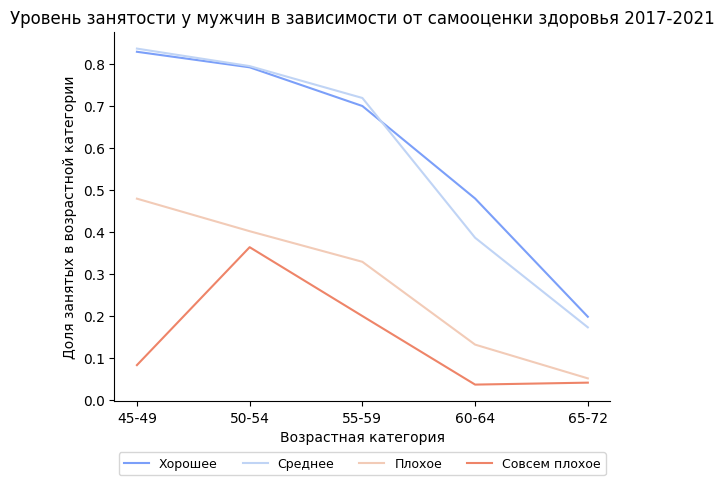

In [576]:
agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask = ((data_for_model['sex_cat']=='Мужчина'))#отбираем только мужчин

# Plot the line chart with customized confidence intervals
seaborn.lineplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)

for pos in ['top', 'right']:
    plt.gca().spines[pos].set_visible(False)

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.xlabel('Возрастная категория')
plt.ylabel('Доля занятых в возрастной категории')
plt.title('Уровень занятости у мужчин в зависимости от самооценки здоровья 2017-2021')


### Уровень занятости мужчин с различной самооценкой здоровья до 2020 гг.

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3500805467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3500805467.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)


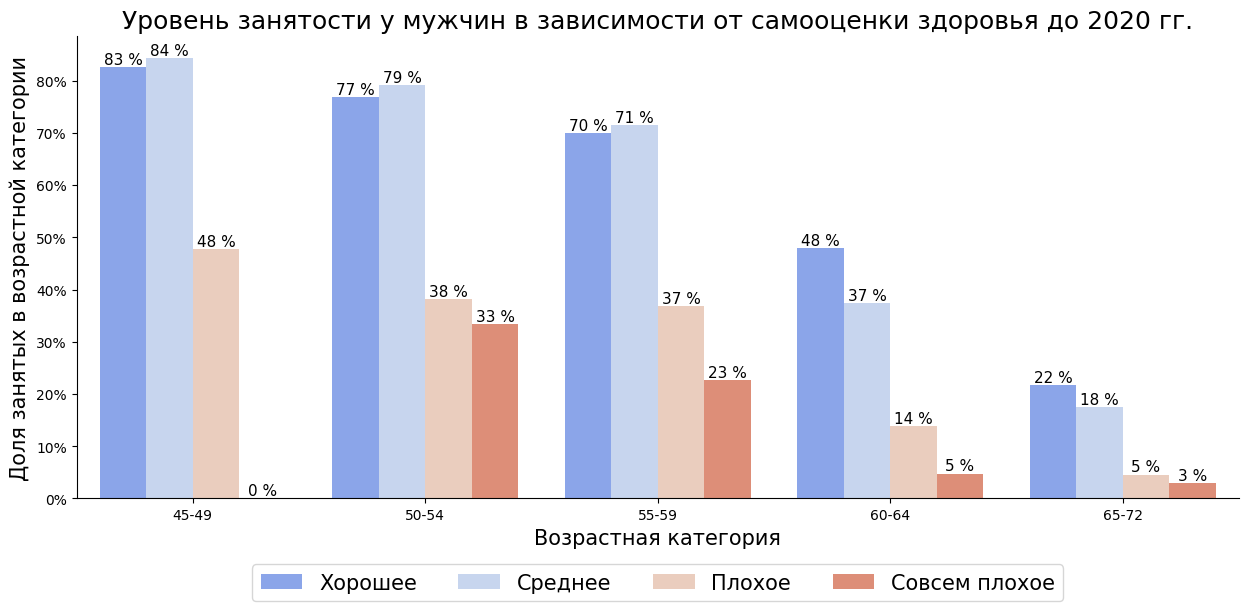

In [694]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <=2019))  # отбираем только мужчин

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart with customized confidence intervals
ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)

for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)

# Calculate the maximum value of the y-axis
max_value = data_for_model[mask]['employed'].max()

# Add value labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.0f} %'.format(height / max_value * 100), ha='center', va='bottom', fontsize=11)

# Format y-axis tick values as percentages multiplied by 100
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=max_value, decimals=0))

plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости у мужчин в зависимости от самооценки здоровья до 2020 гг.', fontsize=18)

plt.show()


### Уровень занятости мужчин с различной самооценкой здоровья в 2020-2021 гг.

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2481300377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2481300377.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)


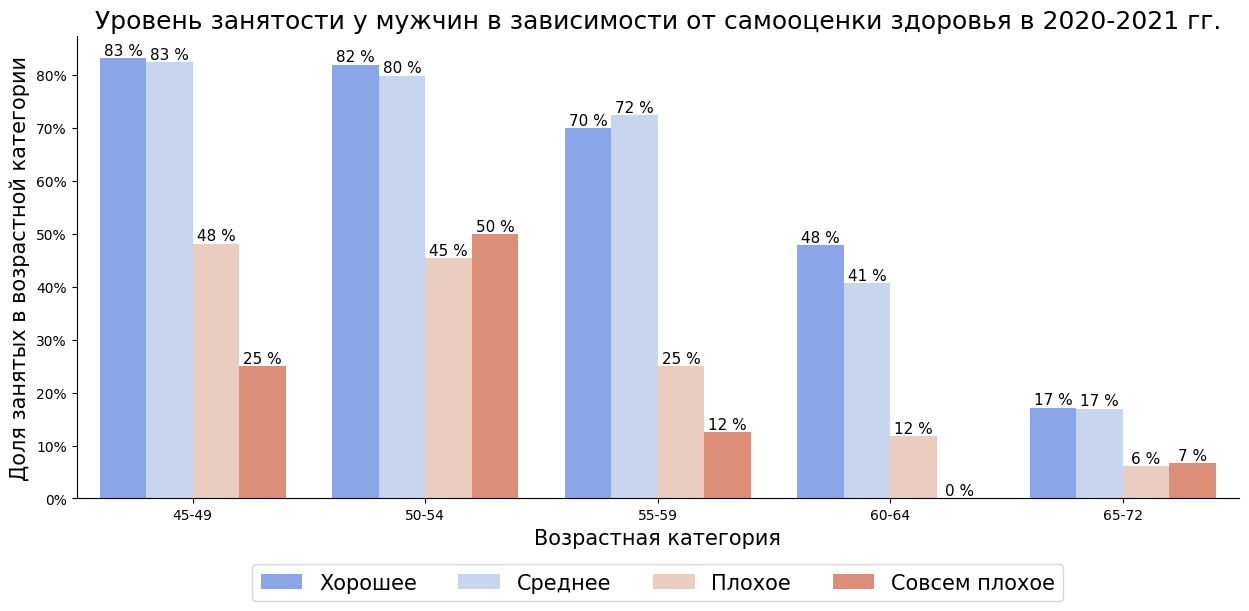

In [696]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >=2020))  # отбираем только мужчин

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart with customized confidence intervals
ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)

for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)

# Calculate the maximum value of the y-axis
max_value = data_for_model[mask]['employed'].max()

# Add value labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.0f} %'.format(height / max_value * 100), ha='center', va='bottom', fontsize=11)

# Format y-axis tick values as percentages multiplied by 100
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=max_value, decimals=0))

plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости у мужчин в зависимости от самооценки здоровья в 2020-2021 гг.', fontsize=18)

plt.show()


### Уровень занятости женщин с различной самооценкой здоровья до 2020 гг.

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3632202686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3632202686.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)


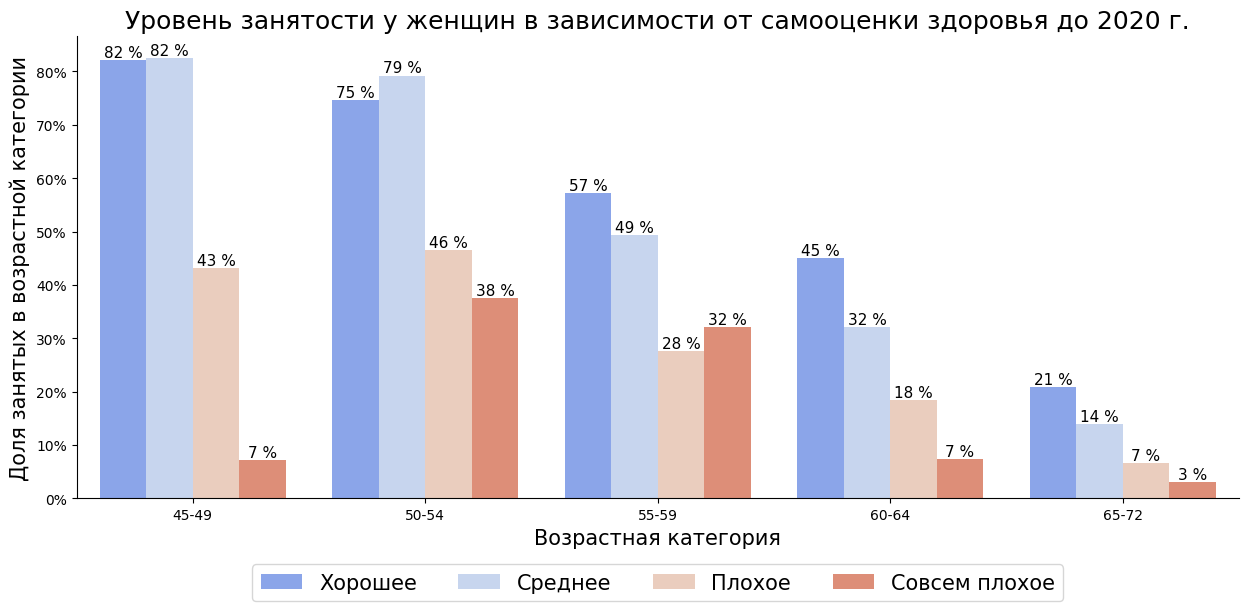

In [700]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019))  # отбираем только мужчин

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart with customized confidence intervals
ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)

for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)

# Calculate the maximum value of the y-axis
max_value = data_for_model[mask]['employed'].max()

# Add value labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.0f} %'.format(height / max_value * 100), ha='center', va='bottom', fontsize=11)

# Format y-axis tick values as percentages multiplied by 100
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=max_value, decimals=0))

plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости у женщин в зависимости от самооценки здоровья до 2020 г.', fontsize=18)

plt.show()


### Уровень занятости женщин с различной самооценкой здоровья в 2020-2021 гг.

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2940005583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2940005583.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)


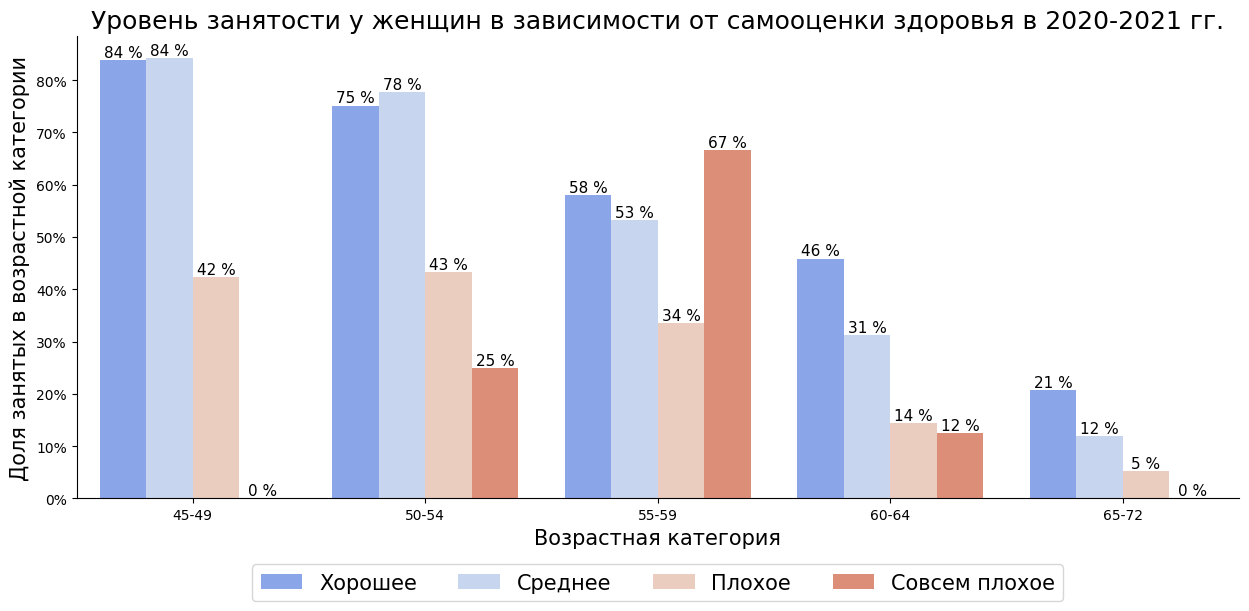

In [701]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

agecat_order = ['45-49', '50-54', '55-59', '60-64', '65-72']

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2020))  # отбираем только мужчин

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart with customized confidence intervals
ax = sns.barplot(x='agecat', y='employed', hue='healthcat', data=data_for_model[mask], palette='coolwarm', ci=None)

for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)

# Calculate the maximum value of the y-axis
max_value = data_for_model[mask]['employed'].max()

# Add value labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.0f} %'.format(height / max_value * 100), ha='center', va='bottom', fontsize=11)

# Format y-axis tick values as percentages multiplied by 100
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=max_value, decimals=0))

plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости у женщин в зависимости от самооценки здоровья в 2020-2021 гг.', fontsize=18)

plt.show()


### Уровень занятости мужчин с разными заболеваниями до 2020 года

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3779756762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3779756762.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_operation], color='orange', ci=None, label='Операция')
/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3779756762.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(x='agecat', y='employed'

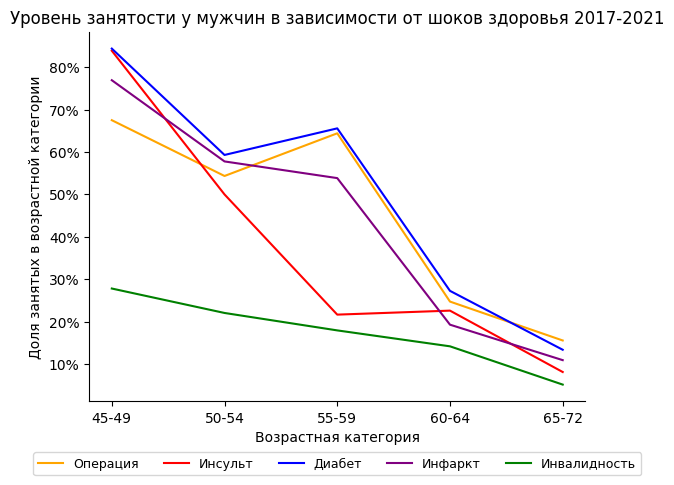

In [608]:
import matplotlib.pyplot as plt
import seaborn

# Define the percentage formatter
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x * 100)

# Set up the figure and axes
fig, ax = plt.subplots()

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask_operation = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['operation_indicator'] == 1))
mask_insult = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['insult_indicator'] == 1))
mask_diabet = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['diabet_indicator'] == 1))
mask_infarkt = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['infarkt_indicator'] == 1))
mask_disabled = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['disabled_indicator'] == 1))

# Plot the line chart with customized confidence intervals
seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_operation], color='orange', ci=None, label='Операция')
seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_insult], color='red', ci=None, label='Инсульт')
seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_diabet], color='blue', ci=None, label='Диабет')
seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_infarkt], color='purple', ci=None, label='Инфаркт')
seaborn.lineplot(x='agecat', y='employed', data=data_for_model[mask_disabled], color='green', ci=None, label='Инвалидность')

# Set the Y-axis formatter
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))

# Remove spines
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

# Set legend and labels
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=9)
plt.xlabel('Возрастная категория')
plt.ylabel('Доля занятых в возрастной категории')
plt.title('Уровень занятости у мужчин в зависимости от шоков здоровья 2017-2021')

# Show the plot
plt.show()

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/3086247986.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)


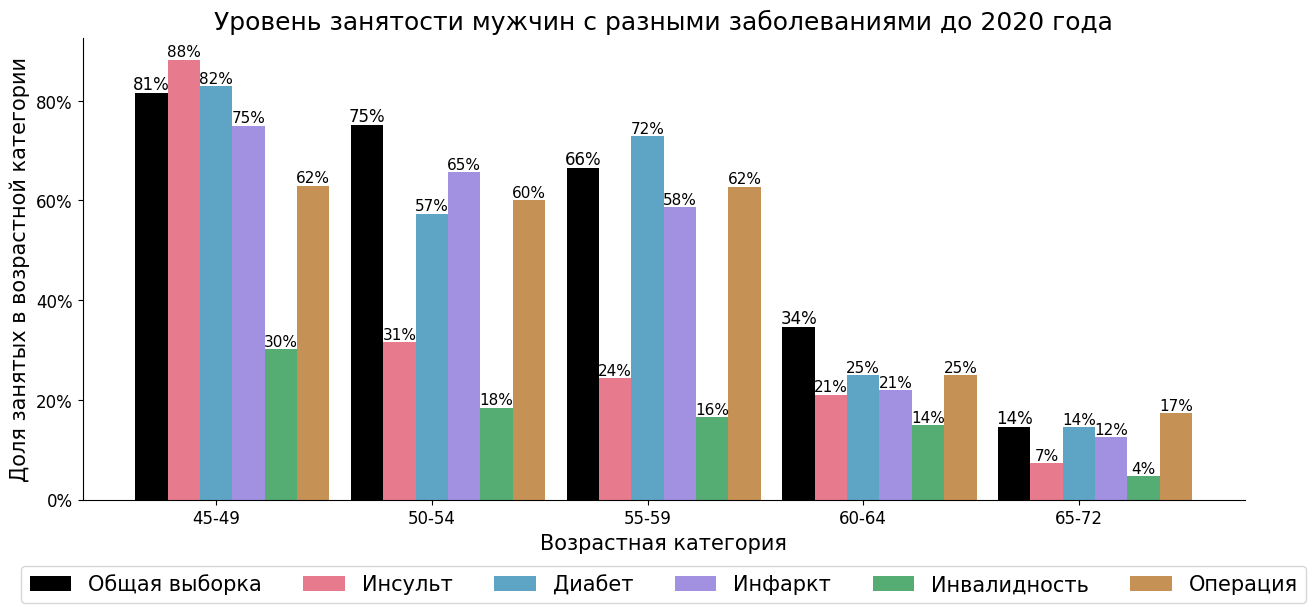

In [723]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the percentage formatter
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x)

fig, ax = plt.subplots(figsize=(15, 6))

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask_operation = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019) & (data_for_model['operation_indicator'] == 1))
mask_insult = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019) & (data_for_model['insult_indicator'] == 1))
mask_diabet = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019) & (data_for_model['diabet_indicator'] == 1))
mask_infarkt = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019) & (data_for_model['infarkt_indicator'] == 1))
mask_disabled = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019) & (data_for_model['disabled_indicator'] == 1))
mask_common = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] <= 2019))

# Calculate the percentage of employed individuals for each age category
data_operation = data_for_model[mask_operation].groupby('agecat')['employed'].mean() * 100
data_insult = data_for_model[mask_insult].groupby('agecat')['employed'].mean() * 100
data_diabet = data_for_model[mask_diabet].groupby('agecat')['employed'].mean() * 100
data_infarkt = data_for_model[mask_infarkt].groupby('agecat')['employed'].mean() * 100
data_disabled = data_for_model[mask_disabled].groupby('agecat')['employed'].mean() * 100
data_common = data_for_model[mask_common].groupby('agecat')['employed'].mean() * 100

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = range(len(agecat_order))

# Plot the bar chart
plt.bar(positions, data_common, width=bar_width, color='#000000', label='Общая выборка')
plt.bar([p + bar_width for p in positions], data_insult, width=bar_width, color='#E77B8D', label='Инсульт')
plt.bar([p + 2*bar_width for p in positions], data_diabet, width=bar_width, color='#5EA4C5', label='Диабет')
plt.bar([p + 3*bar_width for p in positions], data_infarkt, width=bar_width, color='#A291E1', label='Инфаркт')
plt.bar([p + 4*bar_width for p in positions], data_disabled, width=bar_width, color='#56AD74', label='Инвалидность')
plt.bar([p + 5*bar_width for p in positions], data_operation, width=bar_width, color='#C69154', label='Операция')


# Add value labels to each bar
for i, val in enumerate(data_common):
    plt.text(i, val, f'{int(val)}%', ha='center', va='bottom', fontsize=12)
for i, val in enumerate(data_insult):
    plt.text(i + bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_diabet):
    plt.text(i + 2*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_infarkt):
    plt.text(i + 3*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_disabled):
    plt.text(i + 4*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_operation):
    plt.text(i + 5*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)

# Set the X-axis tick positions and labels
plt.xticks([p + 2*bar_width for p in positions], agecat_order, fontsize=12)

# Set the Y-axis formatter
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))

# Set the Y-axis tick labels font size
plt.yticks(fontsize=12)

# Remove spines
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

# Set legend and labels
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)
plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости мужчин с разными заболеваниями до 2020 года', fontsize=18)

# Show the plot
plt.show()


### Уровень занятости мужчин с разными заболеваниями в пандемийные годы 2020-2021

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/87415004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)


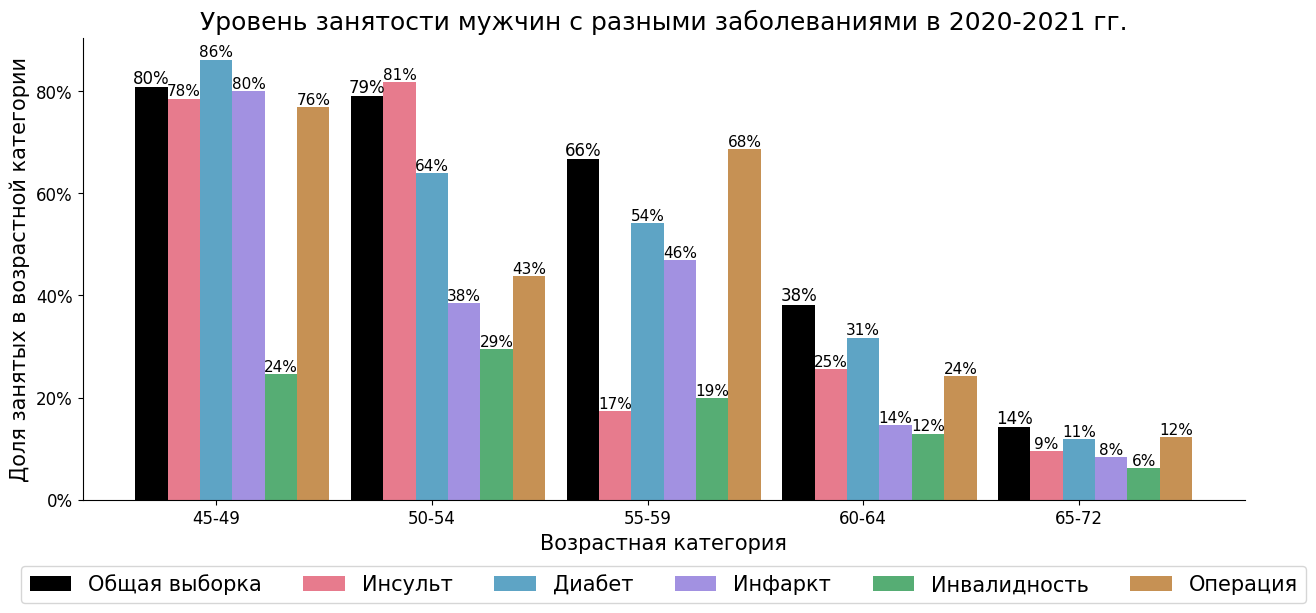

In [724]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the percentage formatter
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x)

fig, ax = plt.subplots(figsize=(15, 6))

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask_operation = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020) & (data_for_model['operation_indicator'] == 1))
mask_insult = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020) & (data_for_model['insult_indicator'] == 1))
mask_diabet = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020) & (data_for_model['diabet_indicator'] == 1))
mask_infarkt = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020) & (data_for_model['infarkt_indicator'] == 1))
mask_disabled = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020) & (data_for_model['disabled_indicator'] == 1))
mask_common = ((data_for_model['sex_cat'] == 'Мужчина') & (data_for_model['year'] >= 2020))

# Calculate the percentage of employed individuals for each age category
data_operation = data_for_model[mask_operation].groupby('agecat')['employed'].mean() * 100
data_insult = data_for_model[mask_insult].groupby('agecat')['employed'].mean() * 100
data_diabet = data_for_model[mask_diabet].groupby('agecat')['employed'].mean() * 100
data_infarkt = data_for_model[mask_infarkt].groupby('agecat')['employed'].mean() * 100
data_disabled = data_for_model[mask_disabled].groupby('agecat')['employed'].mean() * 100
data_common = data_for_model[mask_common].groupby('agecat')['employed'].mean() * 100

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = range(len(agecat_order))

# Plot the bar chart
plt.bar(positions, data_common, width=bar_width, color='#000000', label='Общая выборка')
plt.bar([p + bar_width for p in positions], data_insult, width=bar_width, color='#E77B8D', label='Инсульт')
plt.bar([p + 2*bar_width for p in positions], data_diabet, width=bar_width, color='#5EA4C5', label='Диабет')
plt.bar([p + 3*bar_width for p in positions], data_infarkt, width=bar_width, color='#A291E1', label='Инфаркт')
plt.bar([p + 4*bar_width for p in positions], data_disabled, width=bar_width, color='#56AD74', label='Инвалидность')
plt.bar([p + 5*bar_width for p in positions], data_operation, width=bar_width, color='#C69154', label='Операция')


# Add value labels to each bar
for i, val in enumerate(data_common):
    plt.text(i, val, f'{int(val)}%', ha='center', va='bottom', fontsize=12)
for i, val in enumerate(data_insult):
    plt.text(i + bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_diabet):
    plt.text(i + 2*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_infarkt):
    plt.text(i + 3*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_disabled):
    plt.text(i + 4*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_operation):
    plt.text(i + 5*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)

# Set the X-axis tick positions and labels
plt.xticks([p + 2*bar_width for p in positions], agecat_order, fontsize=12)

# Set the Y-axis formatter
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))

# Set the Y-axis tick labels font size
plt.yticks(fontsize=12)

# Remove spines
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

# Set legend and labels
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)
plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости мужчин с разными заболеваниями в 2020-2021 гг.', fontsize=18)

# Show the plot
plt.show()


### Уровень занятости женщин с разными заболеваниями до 2020 г.

/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/1360352157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)


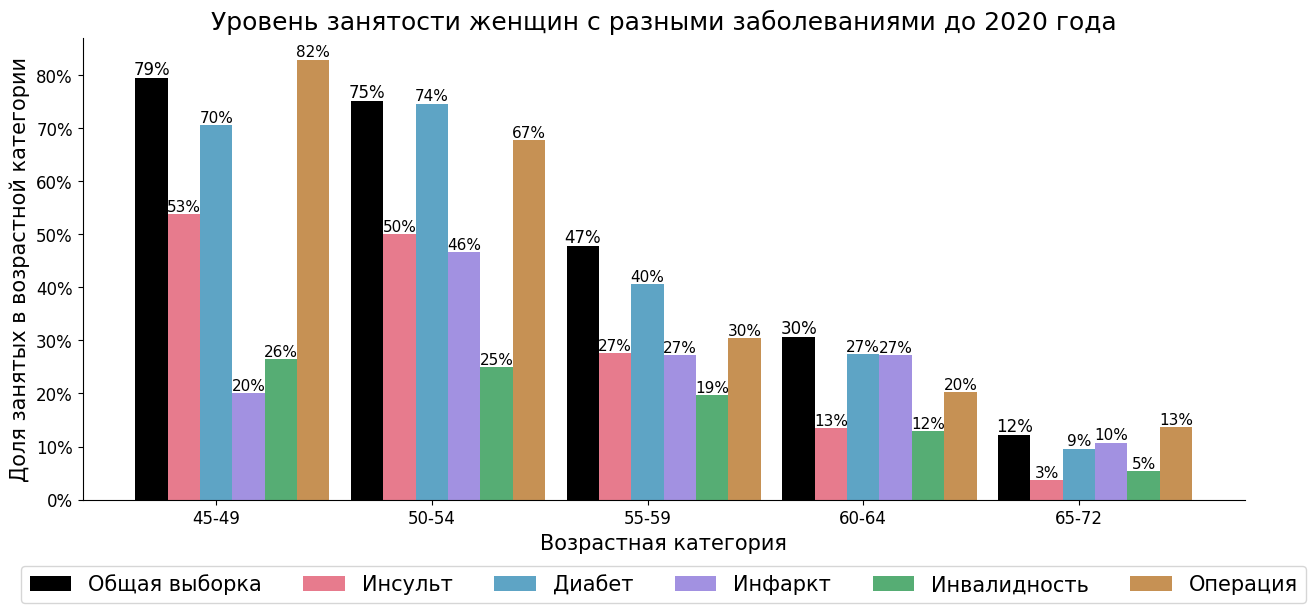

In [725]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the percentage formatter
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x)

fig, ax = plt.subplots(figsize=(15, 6))

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask_operation = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019) & (data_for_model['operation_indicator'] == 1))
mask_insult = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019) & (data_for_model['insult_indicator'] == 1))
mask_diabet = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019) & (data_for_model['diabet_indicator'] == 1))
mask_infarkt = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019) & (data_for_model['infarkt_indicator'] == 1))
mask_disabled = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019) & (data_for_model['disabled_indicator'] == 1))
mask_common = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] <= 2019))

# Calculate the percentage of employed individuals for each age category
data_operation = data_for_model[mask_operation].groupby('agecat')['employed'].mean() * 100
data_insult = data_for_model[mask_insult].groupby('agecat')['employed'].mean() * 100
data_diabet = data_for_model[mask_diabet].groupby('agecat')['employed'].mean() * 100
data_infarkt = data_for_model[mask_infarkt].groupby('agecat')['employed'].mean() * 100
data_disabled = data_for_model[mask_disabled].groupby('agecat')['employed'].mean() * 100
data_common = data_for_model[mask_common].groupby('agecat')['employed'].mean() * 100

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = range(len(agecat_order))

# Plot the bar chart
plt.bar(positions, data_common, width=bar_width, color='#000000', label='Общая выборка')
plt.bar([p + bar_width for p in positions], data_insult, width=bar_width, color='#E77B8D', label='Инсульт')
plt.bar([p + 2*bar_width for p in positions], data_diabet, width=bar_width, color='#5EA4C5', label='Диабет')
plt.bar([p + 3*bar_width for p in positions], data_infarkt, width=bar_width, color='#A291E1', label='Инфаркт')
plt.bar([p + 4*bar_width for p in positions], data_disabled, width=bar_width, color='#56AD74', label='Инвалидность')
plt.bar([p + 5*bar_width for p in positions], data_operation, width=bar_width, color='#C69154', label='Операция')


# Add value labels to each bar
for i, val in enumerate(data_common):
    plt.text(i, val, f'{int(val)}%', ha='center', va='bottom', fontsize=12)
for i, val in enumerate(data_insult):
    plt.text(i + bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_diabet):
    plt.text(i + 2*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_infarkt):
    plt.text(i + 3*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_disabled):
    plt.text(i + 4*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_operation):
    plt.text(i + 5*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)

# Set the X-axis tick positions and labels
plt.xticks([p + 2*bar_width for p in positions], agecat_order, fontsize=12)

# Set the Y-axis formatter
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))

# Set the Y-axis tick labels font size
plt.yticks(fontsize=12)

# Remove spines
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

# Set legend and labels
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)
plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости женщин с разными заболеваниями до 2020 года', fontsize=18)

# Show the plot
plt.show()


/var/folders/r1/8tlnwt5d5qz415w12qjjlxgm0000gn/T/ipykernel_74837/2948707725.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)


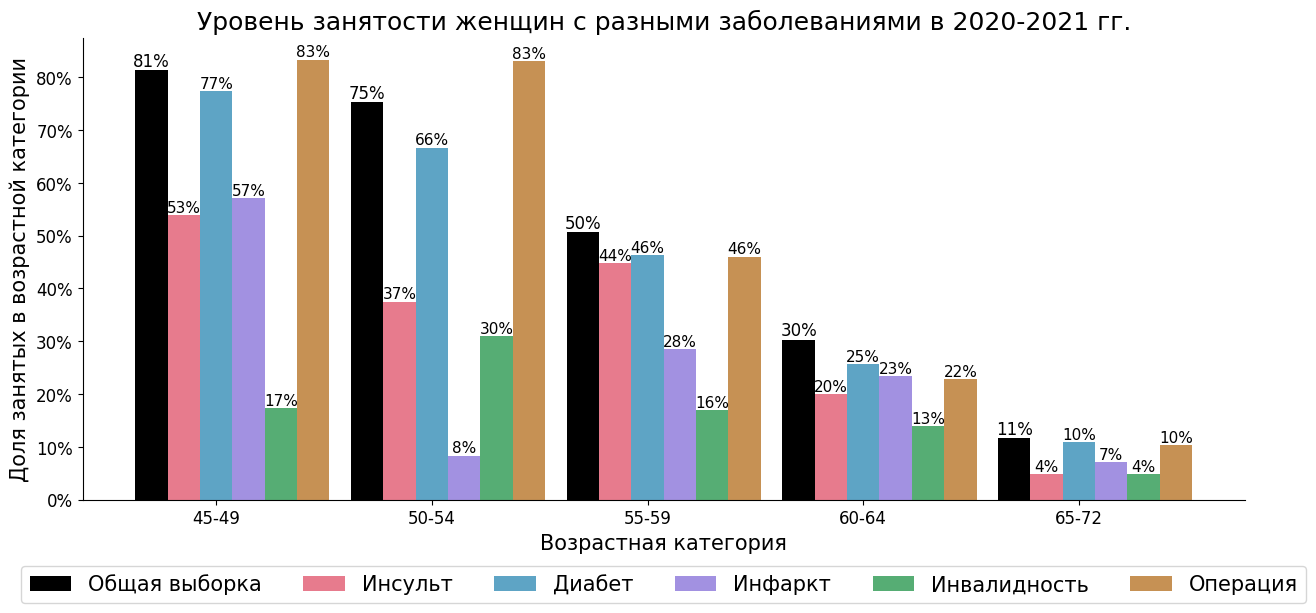

In [726]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the percentage formatter
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x)

fig, ax = plt.subplots(figsize=(15, 6))

# Sort the 'agecat' column based on the desired order
data_for_model['agecat'] = pd.Categorical(data_for_model['agecat'], categories=agecat_order, ordered=True)

mask_operation = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019) & (data_for_model['operation_indicator'] == 1))
mask_insult = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019) & (data_for_model['insult_indicator'] == 1))
mask_diabet = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019) & (data_for_model['diabet_indicator'] == 1))
mask_infarkt = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019) & (data_for_model['infarkt_indicator'] == 1))
mask_disabled = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019) & (data_for_model['disabled_indicator'] == 1))
mask_common = ((data_for_model['sex_cat'] == 'Женщина') & (data_for_model['year'] >= 2019))

# Calculate the percentage of employed individuals for each age category
data_operation = data_for_model[mask_operation].groupby('agecat')['employed'].mean() * 100
data_insult = data_for_model[mask_insult].groupby('agecat')['employed'].mean() * 100
data_diabet = data_for_model[mask_diabet].groupby('agecat')['employed'].mean() * 100
data_infarkt = data_for_model[mask_infarkt].groupby('agecat')['employed'].mean() * 100
data_disabled = data_for_model[mask_disabled].groupby('agecat')['employed'].mean() * 100
data_common = data_for_model[mask_common].groupby('agecat')['employed'].mean() * 100

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = range(len(agecat_order))

# Plot the bar chart
plt.bar(positions, data_common, width=bar_width, color='#000000', label='Общая выборка')
plt.bar([p + bar_width for p in positions], data_insult, width=bar_width, color='#E77B8D', label='Инсульт')
plt.bar([p + 2*bar_width for p in positions], data_diabet, width=bar_width, color='#5EA4C5', label='Диабет')
plt.bar([p + 3*bar_width for p in positions], data_infarkt, width=bar_width, color='#A291E1', label='Инфаркт')
plt.bar([p + 4*bar_width for p in positions], data_disabled, width=bar_width, color='#56AD74', label='Инвалидность')
plt.bar([p + 5*bar_width for p in positions], data_operation, width=bar_width, color='#C69154', label='Операция')


# Add value labels to each bar
for i, val in enumerate(data_common):
    plt.text(i, val, f'{int(val)}%', ha='center', va='bottom', fontsize=12)
for i, val in enumerate(data_insult):
    plt.text(i + bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_diabet):
    plt.text(i + 2*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_infarkt):
    plt.text(i + 3*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_disabled):
    plt.text(i + 4*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)
for i, val in enumerate(data_operation):
    plt.text(i + 5*bar_width, val, f'{int(val)}%', ha='center', va='bottom', fontsize=11)

# Set the X-axis tick positions and labels
plt.xticks([p + 2*bar_width for p in positions], agecat_order, fontsize=12)

# Set the Y-axis formatter
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))

# Set the Y-axis tick labels font size
plt.yticks(fontsize=12)

# Remove spines
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

# Set legend and labels
plt.legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, -0.12), fontsize=15)
plt.xlabel('Возрастная категория', fontsize=15)
plt.ylabel('Доля занятых в возрастной категории', fontsize=15)
plt.title('Уровень занятости женщин с разными заболеваниями в 2020-2021 гг.', fontsize=18)

# Show the plot
plt.show()
